# Get the Data

In [10]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [11]:
#train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/merged_2.csv', sep=';')
train = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e1_merged.csv', sep=';')
train.columns

Index(['Sample', 'Frequency (GHz)', 'LG (mV)', 'HG (mV)', 'Thickness (mm)'], dtype='object')

Samples has serveral Thickness

In [12]:
train['Thickness (mm)'].value_counts().index.sort_values().tolist()

[0.0, 0.04, 0.07, 0.1, 0.2, 0.29, 0.36, 0.57, 1.85, 2.05, 2.25, 3.0]

51 frecuencies (Ghz)

In [13]:
train['Frequency (GHz)'].value_counts().index.sort_values()

Index([100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160.0, 170.0, 180.0, 190.0,
       200.0, 210.0, 220.0, 230.0, 240.0, 250.0, 260.0, 270.0, 280.0, 290.0,
       300.0, 310.0, 320.0, 330.0, 340.0, 350.0, 360.0, 370.0, 380.0, 390.0,
       400.0, 410.0, 420.0, 430.0, 440.0, 450.0, 460.0, 470.0, 480.0, 490.0,
       500.0, 510.0, 520.0, 530.0, 540.0, 550.0, 560.0, 570.0, 580.0, 590.0,
       600.0],
      dtype='float64', name='Frequency (GHz)')

15 types of plastic

In [14]:
train['Sample'].value_counts().index.sort_values()

Index(['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1', 'J1', 'K1', 'L1',
       'M1', 'N1', 'REF'],
      dtype='object', name='Sample')

### Add data of Experiments 2, 3 and 4
**TODO**: Add temparature and RH to experiments 3 and 4

In [15]:
train_e1 = train.copy()
train_e1 = train_e1.drop(columns=['Thickness (mm)']) # Remove `Thickness (mm)`

train_e1['num_experiment'] = 'e1'
train_e1['Sample_original'] = 'None'
train_e1['Integration_Time_(msg)'] = 5

# ['E1', 'H1', 'REF']
train_e2 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e2_merged.csv', sep=';') 
train_e2['num_experiment'] = 'e2'
train_e2['Sample_original'] = 'None'
train_e2['Integration_Time_(msg)'] = 5

# ['REF_1', 'REF_10', 'REF_11', 'REF_12', 'REF_13', 'REF_14', 'REF_15', 'REF_2', 'REF_3', 'REF_4', 'REF_5', 'REF_6', 'REF_7', 'REF_8', 'REF_9']
train_e3 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e3_merged.csv', sep=',') 
train_e3['num_experiment'] = 'e3'
train_e3['Sample_original'] = train_e3['Sample']
train_e3['Sample'] = 'REF'
train_e3['Integration_Time_(msg)'] = 5

# ['B1_12', 'B1_2', 'B1_5', 'B1_9', 'C1_11', 'C1_14', 'C1_4', 'C1_7', 'E3_10', 'E3_13', 'E3_3', 'E3_6', 'REF_1', 'REF_15', 'REF_8']
train_e4 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e4_merged.csv', sep=',')
train_e4['num_experiment'] = 'e4'
train_e4['Sample_original'] = train_e4['Sample']
train_e4['Integration_Time_(msg)'] = 20

# ['B1_17', 'B1_20', 'C1_19', 'C1_22', 'E3_18', 'E3_21', 'REF_16', 'REF_23']
train_e4_v2 = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e4_v2_merged.csv', sep=',')
train_e4_v2['num_experiment'] = 'e4_v2'
train_e4_v2['Sample_original'] = train_e4_v2['Sample']
train_e4_v2['Integration_Time_(msg)'] = 20

# ['A1_1', 'A2_13', 'A3_25', 'A4_43', 'A5_55', 'B1_2', 'B2_14', 'B3_26', 'B4_44', 'B5_56', 'C1_3', 'C2_15', 'C3_27', 'C4_45', 'C5_57', 'D1_4', 'D2_16', 'D3_28', 'D4_46', 'D5_58', 'E1_5', 'E2_17', 'E3_29', 'E4_47', 'E5_59', 'F1_6', 'F2_18', 'F3_30', 'F4_48', 'F5_60', 'G1_7', 'G2_19', 'G3_31', 'G4_37', 'G5_49', 'H1_8', 'H2_20', 'H3_32', 'H4_38', 'H5_50', 'I1_9', 'I2_21', 'I3_33', 'I4_39', 'I5_51', 'J1_10', 'J2_22', 'J3_34', 'J4_40', 'J5_52', 'L1_11', 'L2_23', 'L3_35', 'L4_41', 'L5_53', 'O1_12', 'O2_24', 'O3_36', 'O4_42', 'O5_54']
train_e5  = pd.read_csv('/kaggle/input/fi-optimun-frecuency/e5_merged.csv', sep=',')
train_e5['num_experiment'] = 'e5'
train_e5['Sample_original'] = train_e5['Sample']
train_e5['Integration_Time_(msg)'] = 5

In [16]:
train_all_experiments = pd.concat([train_e1, train_e2, train_e3, train_e4, train_e4_v2, train_e5])
train_all_experiments.reset_index(inplace=True)
train_all_experiments = train_all_experiments.rename(columns = {'index':'index_original'})

train_all_experiments.head() # 8414389 rows x 8 columns

,index_original,Sample,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Integration_Time_(msg)
0,0,A1,100.0,-7.080942,-0.854611,e1,None,5
1,1,A1,100.0,67.024785,0.244141,e1,None,5
2,2,A1,100.0,124.893178,-1.098776,e1,None,5
3,3,A1,100.0,91.075571,0.000000,e1,None,5
4,4,A1,100.0,48.956174,0.122094,e1,None,5


In [17]:
lst_queries = ['Sample.str.startswith("B")', 'Sample.str.startswith("C")', 'Sample.str.startswith("D")', 'Sample.str.startswith("E")', 'Sample.str.startswith("F")', 'Sample.str.startswith("G")', 'Sample.str.startswith("H")', 'Sample.str.startswith("I")', 'Sample.str.startswith("J")', 'Sample.str.startswith("K")', 'Sample.str.startswith("L")', 'Sample.str.startswith("M")', 'Sample.str.startswith("N")', 'Sample.str.startswith("O")', 'Sample.str.startswith("REF")']
lst_types_to_queries = ['B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'REF']

df_temp = train_all_experiments.query('Sample.str.startswith("A")', engine="python")
df_temp = df_temp.drop(columns=['Sample'])
df_temp['Sample'] = 'A'
for i, q in enumerate(lst_queries):
    df_temp2 = train_all_experiments.query(lst_queries[i], engine="python")
    df_temp2 = df_temp2.drop(columns=['Sample'])
    df_temp2['Sample'] = lst_types_to_queries[i]
    df_temp = pd.concat([df_temp, df_temp2]) # 3892248 (?) rows x 7 columns
df_temp.sort_index(inplace=True)
df_temp['index_original'] = train_all_experiments.index
train_all_experiments = df_temp.copy() # 8414389 rows x 8 columns
#train_all_experiments.to_csv('train_all_experiments.csv', index=False)

In [18]:
ser_temp = train_all_experiments['Sample_original'].value_counts()
lst_Sample_original = ser_temp.index.sort_values().tolist()

**Doubts**: Was the REF measured in experiment 5? I use REF measured in experiment 4

In [19]:
train_all_experiments['LG (mV)'].groupby([train_all_experiments['Sample'],
                                          train_all_experiments['num_experiment']
                                         ]).count()

Sample  num_experiment
A       e1                172103
        e5                385121
B       e1                152817
        e4                106800
        e4_v2              83890
        e5                323182
C       e1                166224
        e4                107855
        e4_v2              56757
        e5                301648
D       e1                170548
        e5                312413
E       e1                157089
        e2                428593
        e4                112603
        e4_v2              56729
        e5                319174
F       e1                154569
        e5                313698
G       e1                166421
        e5                322293
H       e1                155589
        e2                423405
        e5                308851
I       e1                157814
        e5                327847
J       e1                158264
        e5                328208
K       e1                152038
L       e1          

In [20]:
train_e4_REF = train_all_experiments[(train_all_experiments.num_experiment=='e4') & (train_all_experiments.Sample=='REF')]

In [21]:
train_all_experiments_e5 = train_all_experiments[train_all_experiments.num_experiment=='e5']

train_get = train_all_experiments_e5[(train_all_experiments_e5.Sample_original == 'A1_1') | (train_all_experiments_e5.Sample_original == 'B1_2') | (train_all_experiments_e5.Sample_original == 'C1_3') | (train_all_experiments_e5.Sample_original == 'D1_4') | (train_all_experiments_e5.Sample_original == 'E1_5') | (train_all_experiments_e5.Sample_original == 'F1_6') | (train_all_experiments_e5.Sample_original == 'G1_7') | (train_all_experiments_e5.Sample_original == 'H1_8') | (train_all_experiments_e5.Sample_original == 'I1_9') | (train_all_experiments_e5.Sample_original == 'J1_10') | (train_all_experiments_e5.Sample_original == 'L1_11') | (train_all_experiments_e5.Sample_original == 'O1_12')]
train_get = pd.concat([train_get, train_e4_REF]).drop(columns=['index_original']) #927303 rows x 7 columns

In [22]:
train_get_day_2 = train_all_experiments_e5[(train_all_experiments_e5.Sample_original == 'A2_13') | (train_all_experiments_e5.Sample_original == 'B2_14') | (train_all_experiments_e5.Sample_original == 'C2_15') | (train_all_experiments_e5.Sample_original == 'D2_16') | (train_all_experiments_e5.Sample_original == 'E2_17') | (train_all_experiments_e5.Sample_original == 'F2_18') | (train_all_experiments_e5.Sample_original == 'G2_19') | (train_all_experiments_e5.Sample_original == 'H2_20') | (train_all_experiments_e5.Sample_original == 'I2_21') | (train_all_experiments_e5.Sample_original == 'J2_22') | (train_all_experiments_e5.Sample_original == 'L2_23') | (train_all_experiments_e5.Sample_original == 'O2_24')].drop(columns=['index_original']) # 774450 rows x 7 columns
train_get_day_2.head()

,Frequency (GHz),LG (mV),HG (mV),num_experiment,Sample_original,Integration_Time_(msg),Sample
4651221,100.0,0.000000,36.625564,e5,A2_13,5,A
4651222,100.0,-0.488341,17.214015,e5,A2_13,5,A
4651223,100.0,0.000000,35.160542,e5,A2_13,5,A
4651224,100.0,1.587108,32.840922,e5,A2_13,5,A
4651225,100.0,2.075449,46.636552,e5,A2_13,5,A


## Convert the data to a format you can easily manipulate



In [23]:
train_get = train_get.rename(columns = {'Sample':'target', 'Frequency (GHz)': 'freq', 'Integration_Time_(msg)': 'int_time' })
train_get.head() #927303 rows x 7 columns

train_get_day_2 = train_get_day_2.rename(columns = {'Sample':'target', 'Frequency (GHz)': 'freq', 'Integration_Time_(msg)': 'int_time' })

**Doubt**: I wonder why there are more type A measures

In [24]:
train_get['target'].value_counts()

target
A      129080
REF    112390
I       66557
O       66551
B       65570
L       64543
C       63423
J       62459
F       61744
D       60652
G       59676
E       58898
H       55760
Name: count, dtype: int64

## Sample a test set, put it aside, and never look at it
The test set is used after the model has been fully trained to assess the model's performance on completely unseen data

Data is split in a stratified fashion, using this at  theTarget as  class labels  
**Conjecture**: It is assumed that there is time independence in the laser measurement.

In [25]:
n_best_freqs = 3

set_freq = set(lst_best_freq_rnd[:n_best_freqs] + lst_best_freq_gb[:n_best_freqs] + lst_best_freq_neigh[:n_best_freqs] + lst_best_freq_tree[:n_best_freqs])
lst_best_freq = list(set_freq)

In [26]:
train_get = train_get.copy()

In [27]:
for i, f in enumerate(lst_best_freq):
    df_tmp = train_get[train_get.freq == lst_best_freq[i]]
    if i == 0:
        train_get_temp = df_tmp.copy()
    else:
        train_get_temp = pd.concat([train_get_temp, df_tmp])

train_get = train_get_temp.copy()
train_get_day_2 = train_get.copy()

In [28]:
train_get['LG (mV)'].groupby(train_get['freq']).count()

freq
250.0    19007
320.0    18792
330.0    18993
Name: LG (mV), dtype: int64

In [29]:
train_get['LG (mV)'].groupby(train_get['target']).count()

target
A      7614
B      3994
C      3788
D      3756
E      3931
F      3621
G      4052
H      3379
I      4057
J      3736
L      4038
O      4054
REF    6772
Name: LG (mV), dtype: int64

In [30]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(train_get, test_size=0.2, random_state=42, stratify=train_get.target)

train_set_day_2, test_set_day_2 = train_test_split(train_get_day_2, test_size=0.2, random_state=42, stratify=train_get.target)

test_get = test_set_day_2.copy()

Check the target distribution of target in a plotted bar. The frequency or proportion are uniform in train and test dataset

In [ ]:
import matplotlib.pylab as plt
ax = train_set['target'].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for train dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [ ]:
ax = test_set['target'].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for test dataset')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

 # Explore the data

In [32]:
train_ex = train_set.copy() #From 628977 to 503181 (or 143601)
test_ex = test_get.copy()

,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time,target
3844108,320.0,0.488341,763.581979,e4,REF_1,20,REF
7792771,330.0,0.854596,557.807374,e5,L1_11,5,L
5860950,250.0,2.075449,544.011760,e5,E1_5,5,E
6825581,330.0,2.441704,389.940119,e5,H1_8,5,H
8123202,320.0,-0.122085,256.867290,e5,O1_12,5,O
...,...,...,...,...,...,...,...
7138047,320.0,1.587108,5.615878,e5,I1_9,5,I
7138828,330.0,0.976682,4.517150,e5,I1_9,5,I
7128330,250.0,1.587108,453.912854,e5,I1_9,5,I
5869980,320.0,1.098767,282.871509,e5,E1_5,5,E


## Visualize one HG (mV) a one freq like time series  

In [39]:
train_get.groupby([train_get['target'], train_get['num_experiment']]).count()

,,freq,LG (mV),HG (mV),Sample_original,int_time
target,num_experiment,,,,,
A,e5,7614,7614,7614,7614,7614
B,e5,3994,3994,3994,3994,3994
C,e5,3788,3788,3788,3788,3788
D,e5,3756,3756,3756,3756,3756
E,e5,3931,3931,3931,3931,3931
F,e5,3621,3621,3621,3621,3621
G,e5,4052,4052,4052,4052,4052
H,e5,3379,3379,3379,3379,3379
I,e5,4057,4057,4057,4057,4057


In [40]:
# 250.0, 330.0, 320.0, 410.0
Y_e1 = train_get[(train_get.target=='E')&(train_get.freq==250.0)&(train_get.num_experiment=='e5')]['HG (mV)'].values
Y_e2 = train_get[(train_get.target=='E')&(train_get.freq==330.0)&(train_get.num_experiment=='e5')]['HG (mV)'].values
Y_e4 = train_get[(train_get.target=='E')&(train_get.freq==320.0)&(train_get.num_experiment=='e5')]['HG (mV)'].values


In [43]:
df_tmp = pd.DataFrame(np.hstack((Y_e1[:1000].reshape(-1, 1),Y_e2[:1000].reshape(-1, 1),Y_e4[:1000].reshape(-1, 1))),
                      columns=['250', '330', '320'],
                      index=np.arange(0, 1000, 1))

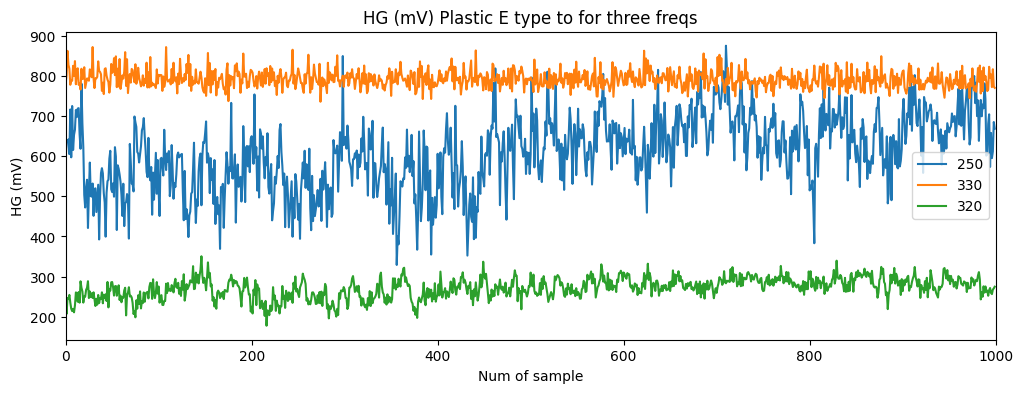

In [45]:
_ = df_tmp.plot(figsize=(12,4), xlim = ([0,1000]), 
                ylabel = 'HG (mV)',
                xlabel = 'Num of sample',
                title= 'HG (mV) Plastic E type to for three freqs' )

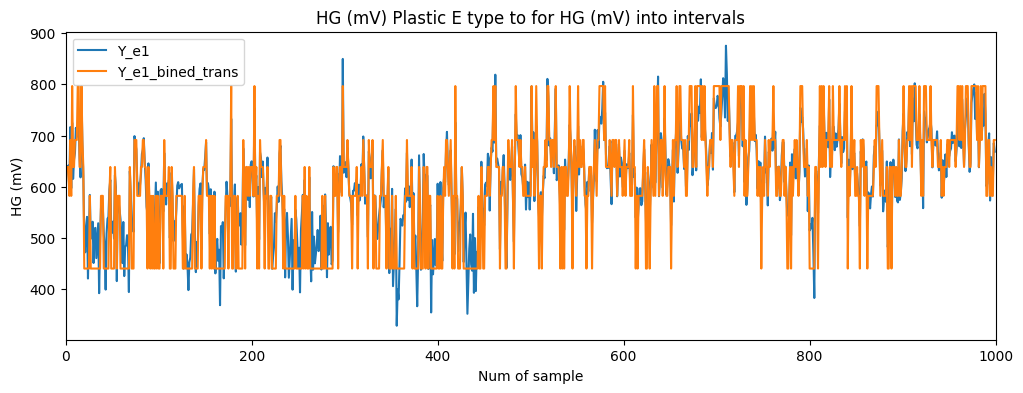

In [46]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
est.fit(Y_e1.reshape(-1, 1))
Y_e1_bined = est.transform(Y_e1.reshape(-1, 1))
Y_e1_bined_trans = est.inverse_transform(Y_e1_bined)

df_tmp = pd.DataFrame(np.hstack((Y_e1[:1000].reshape(-1, 1),Y_e1_bined[:1000], Y_e1_bined_trans[:1000])),
                      columns=['Y_e1', 'Y_e1_bined', 'Y_e1_bined_trans' ],
                      index=np.arange(0, 1000, 1))

_ = df_tmp[['Y_e1','Y_e1_bined_trans']].plot(figsize=(12,4), xlim = ([0,1000]), 
                ylabel = 'HG (mV)',
                xlabel = 'Num of sample',
                title= 'HG (mV) Plastic E type to for HG (mV) into intervals' )
                      

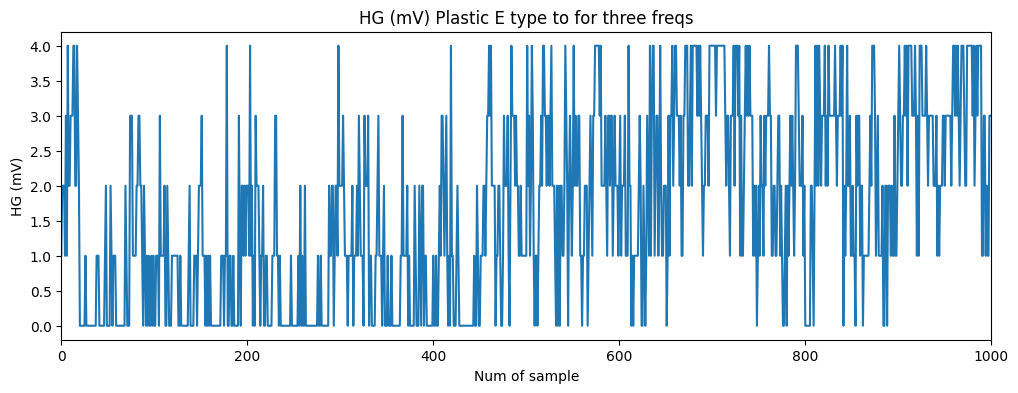

In [47]:
_ = df_tmp['Y_e1_bined'].plot(figsize=(12,4), xlim = ([0,1000]), 
                ylabel = 'HG (mV)',
                xlabel = 'Num of sample',
                title= 'HG (mV) Plastic E type to for three freqs' )

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)&(train_ts.num_experiment=='e1')]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title('Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1 of Experiment 1')
fig.show()


## Visualize distributions
Knowledge of various sampling and data generating distributions allows us to quantify potential errors in an estimate that might be due to random variation.

In [ ]:
train_ex = train_ex.astype({"freq": int,})
train_ex.info()


In [14]:
lst_tmp = train_ex['target'].value_counts().index.sort_values().tolist()
lst_tmp.remove('REF')
lst_tmp

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'O']

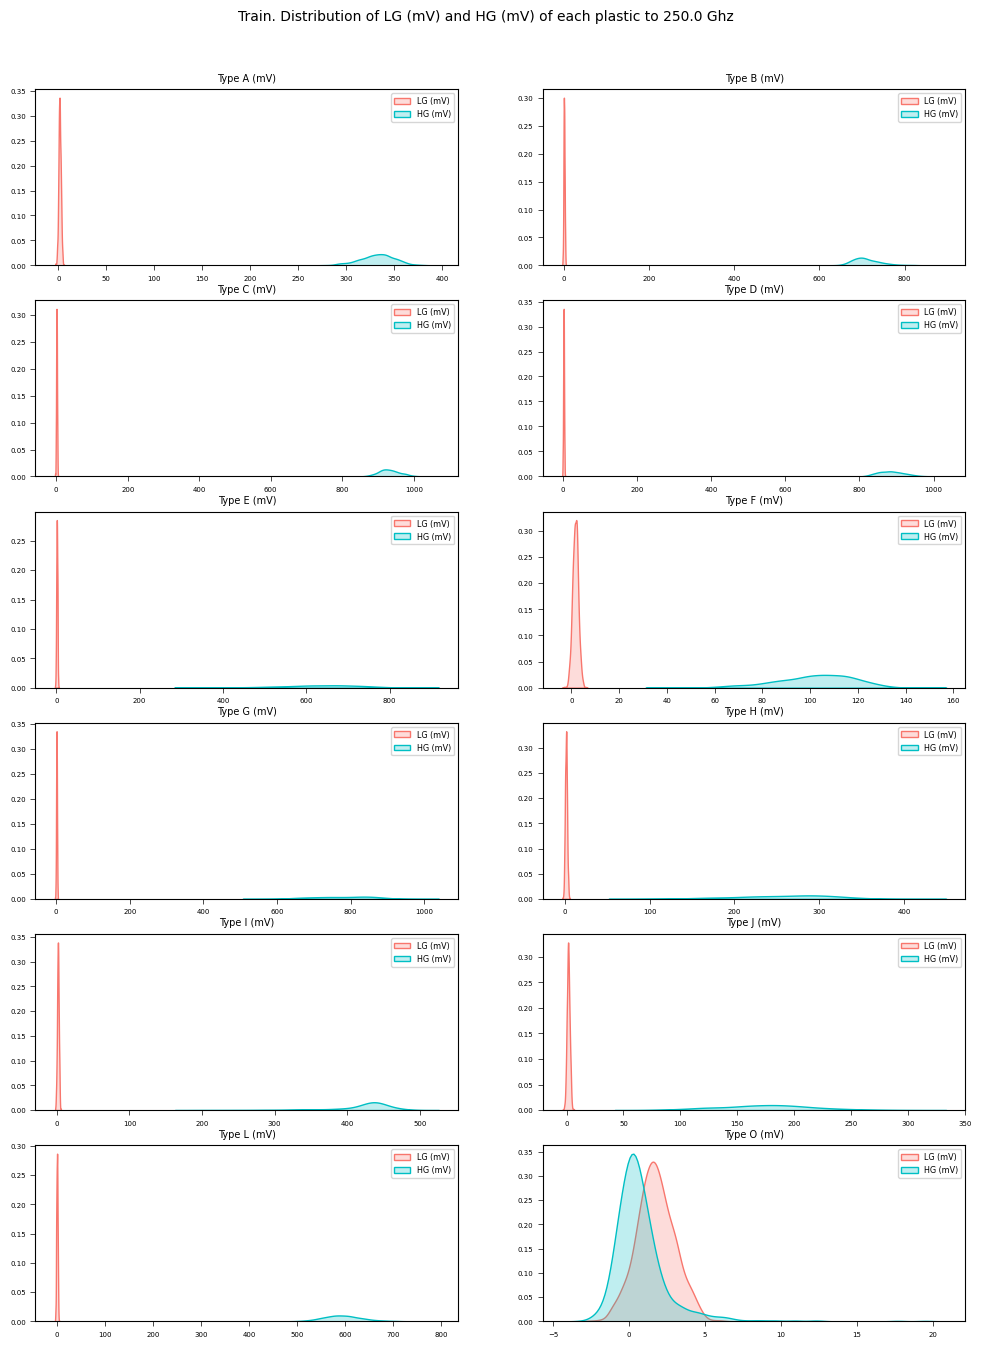

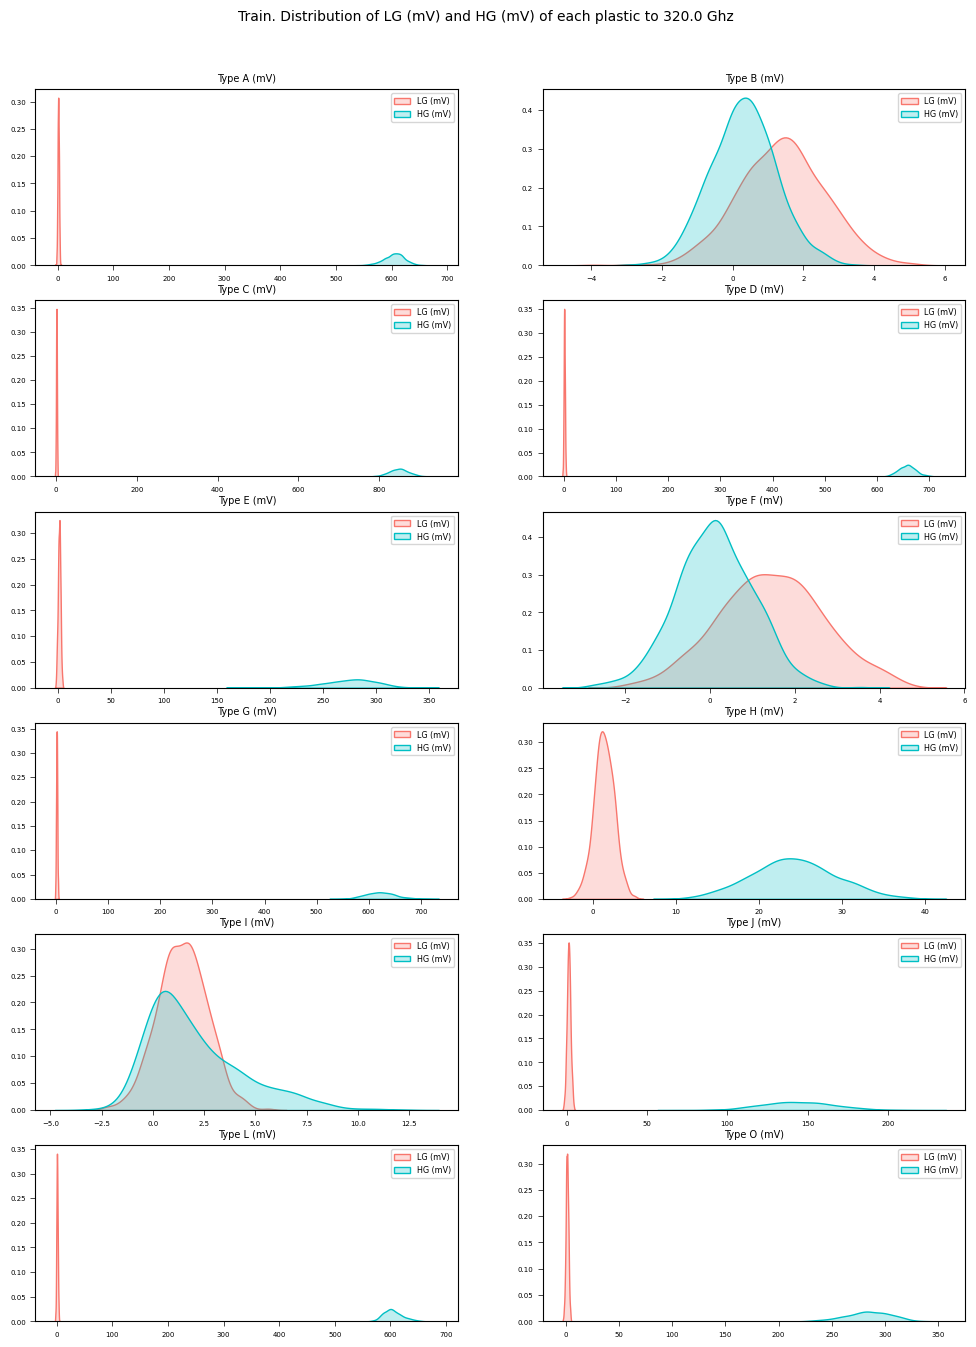

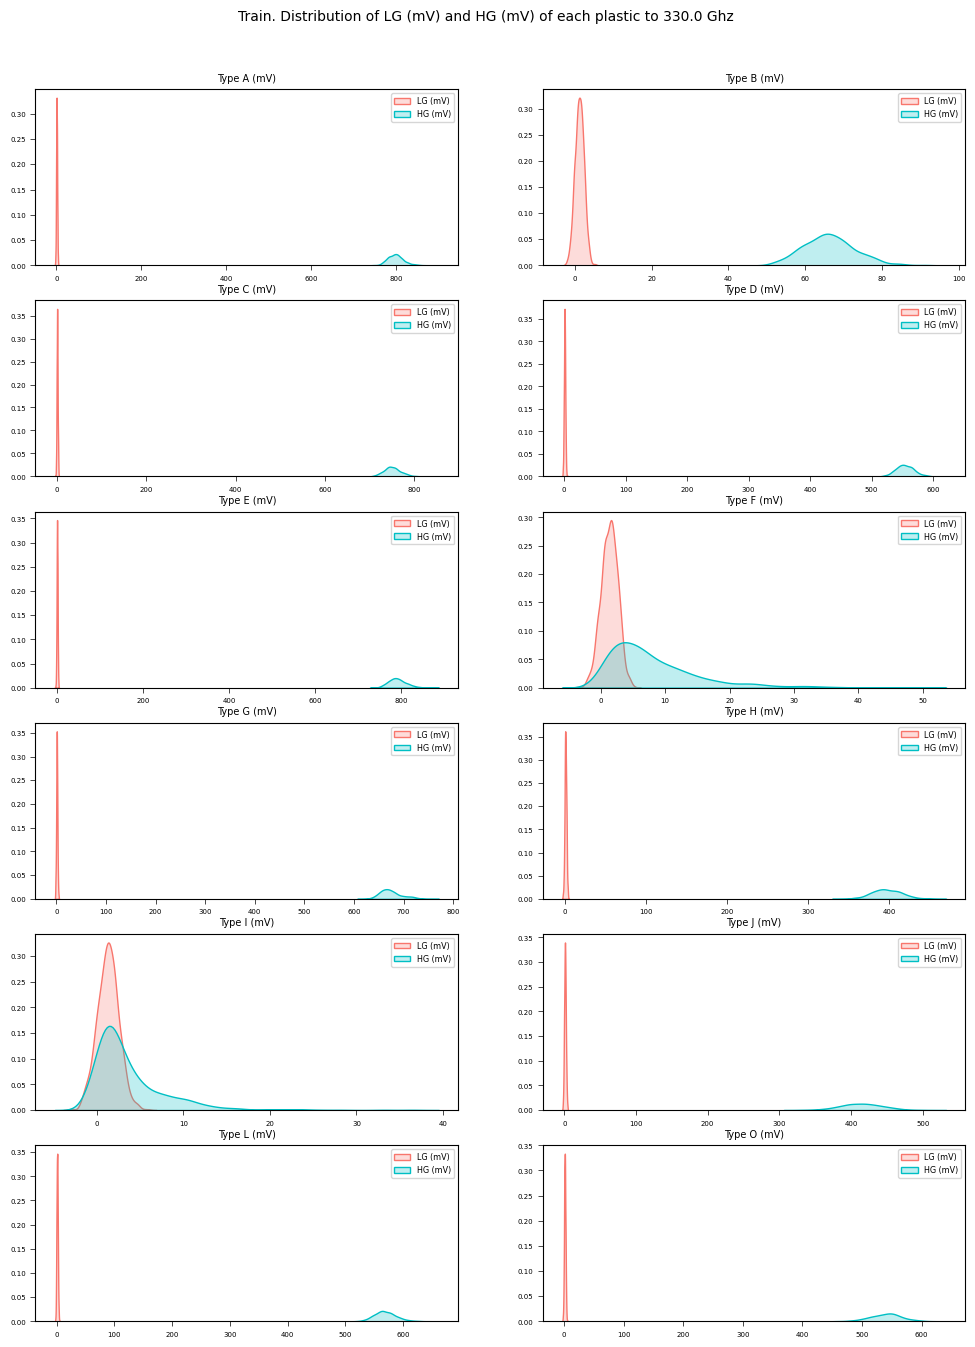

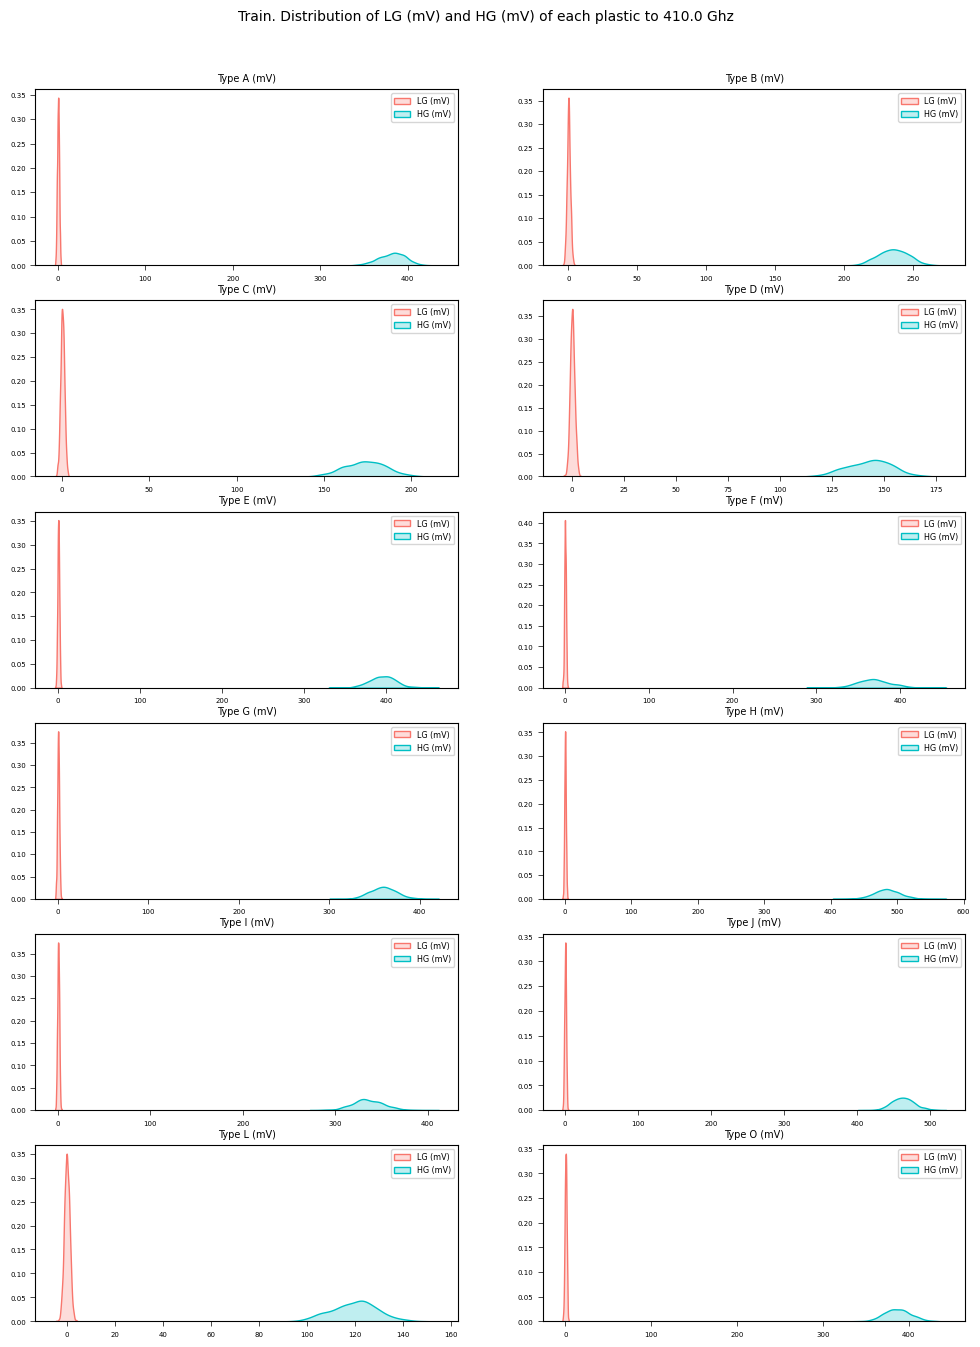

In [21]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 2
    nrows = 6
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 16))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            t.remove('REF')
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Train. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

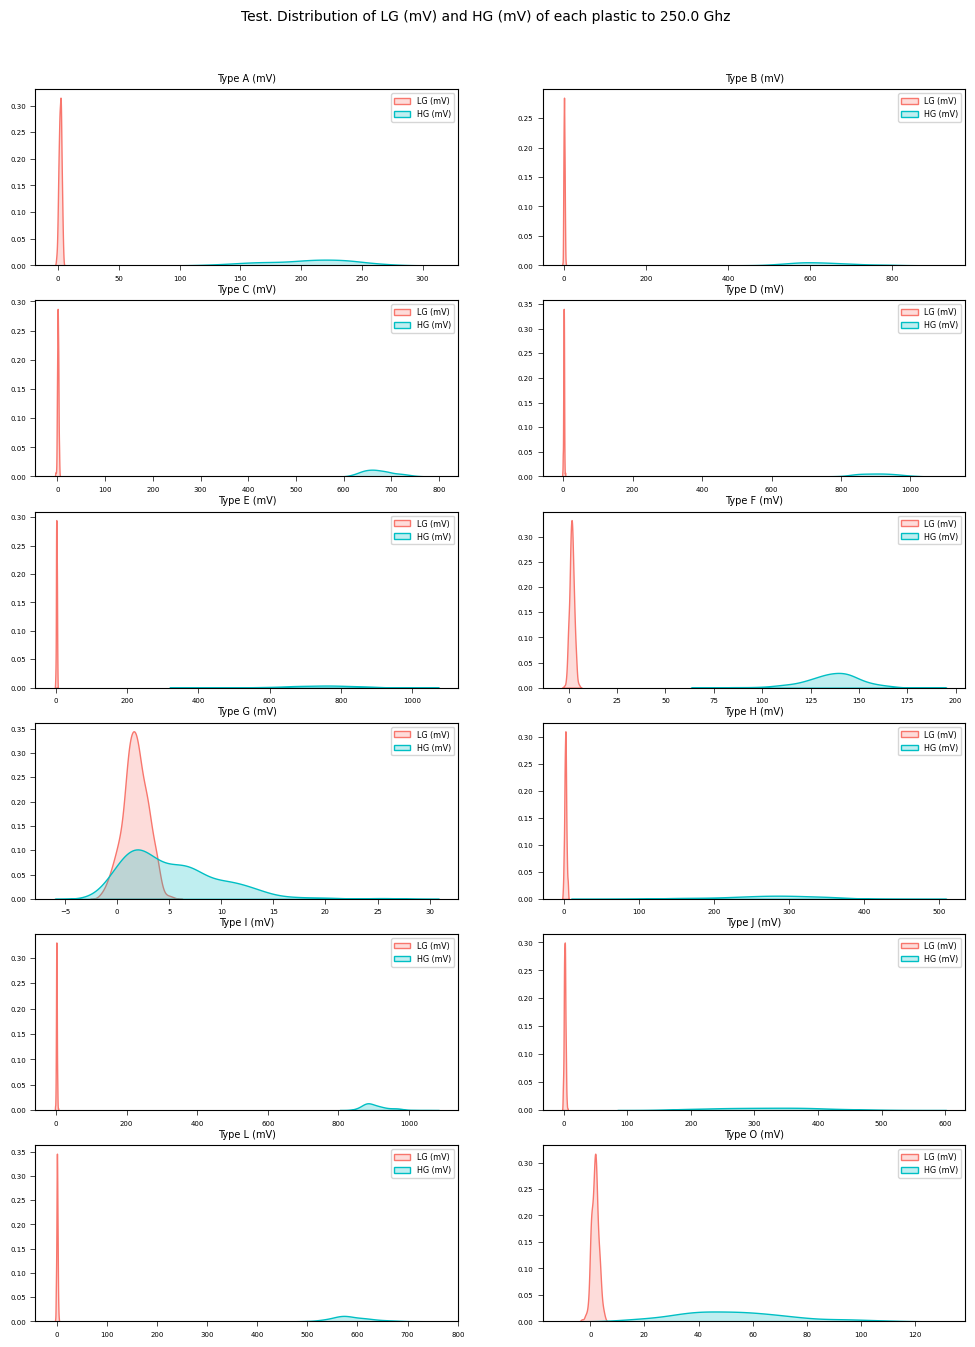

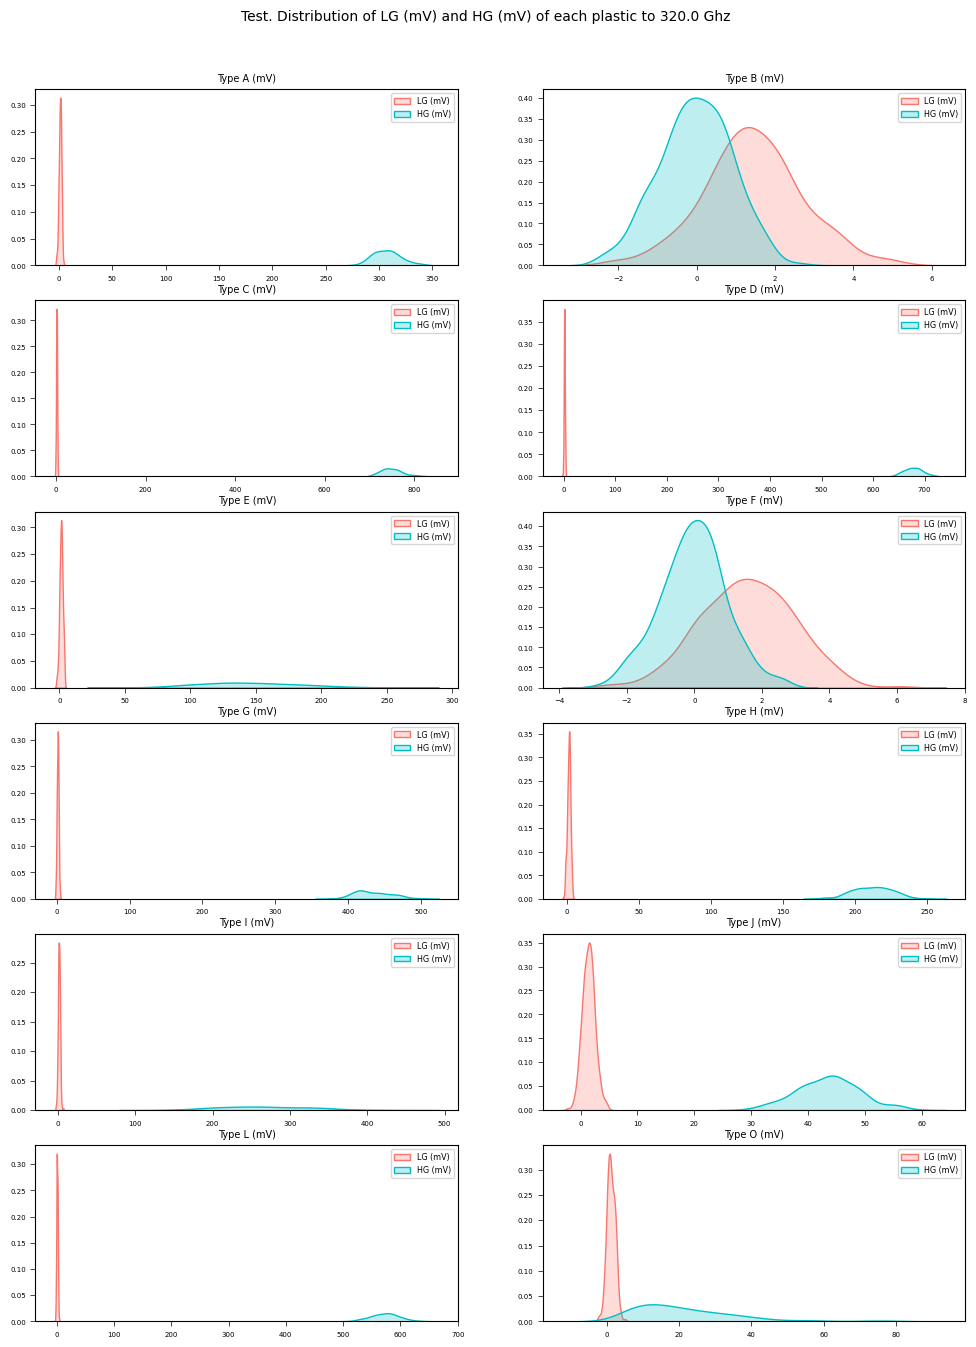

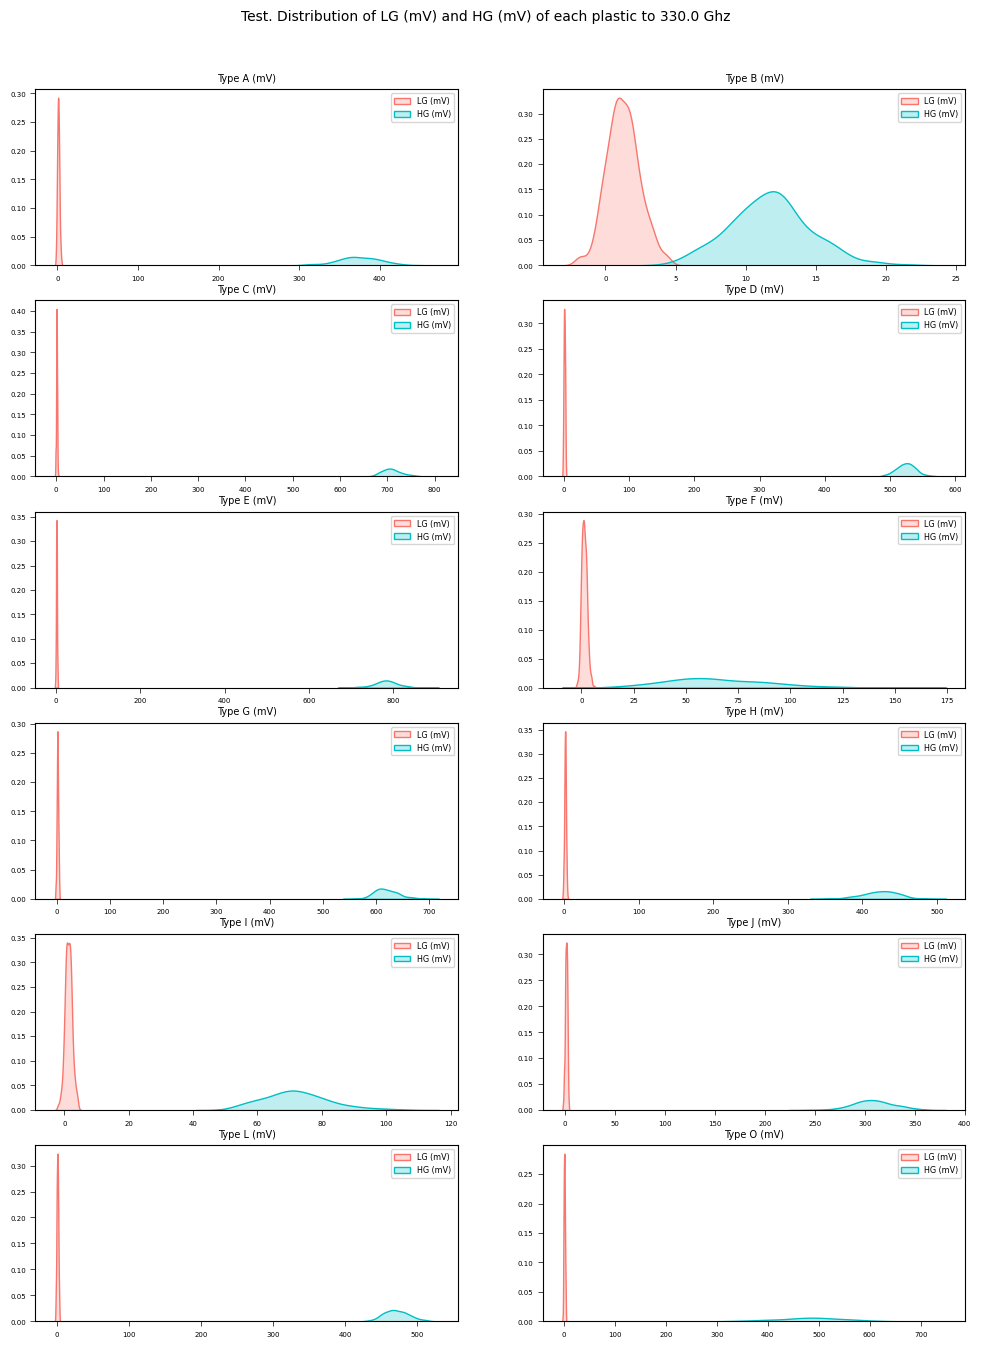

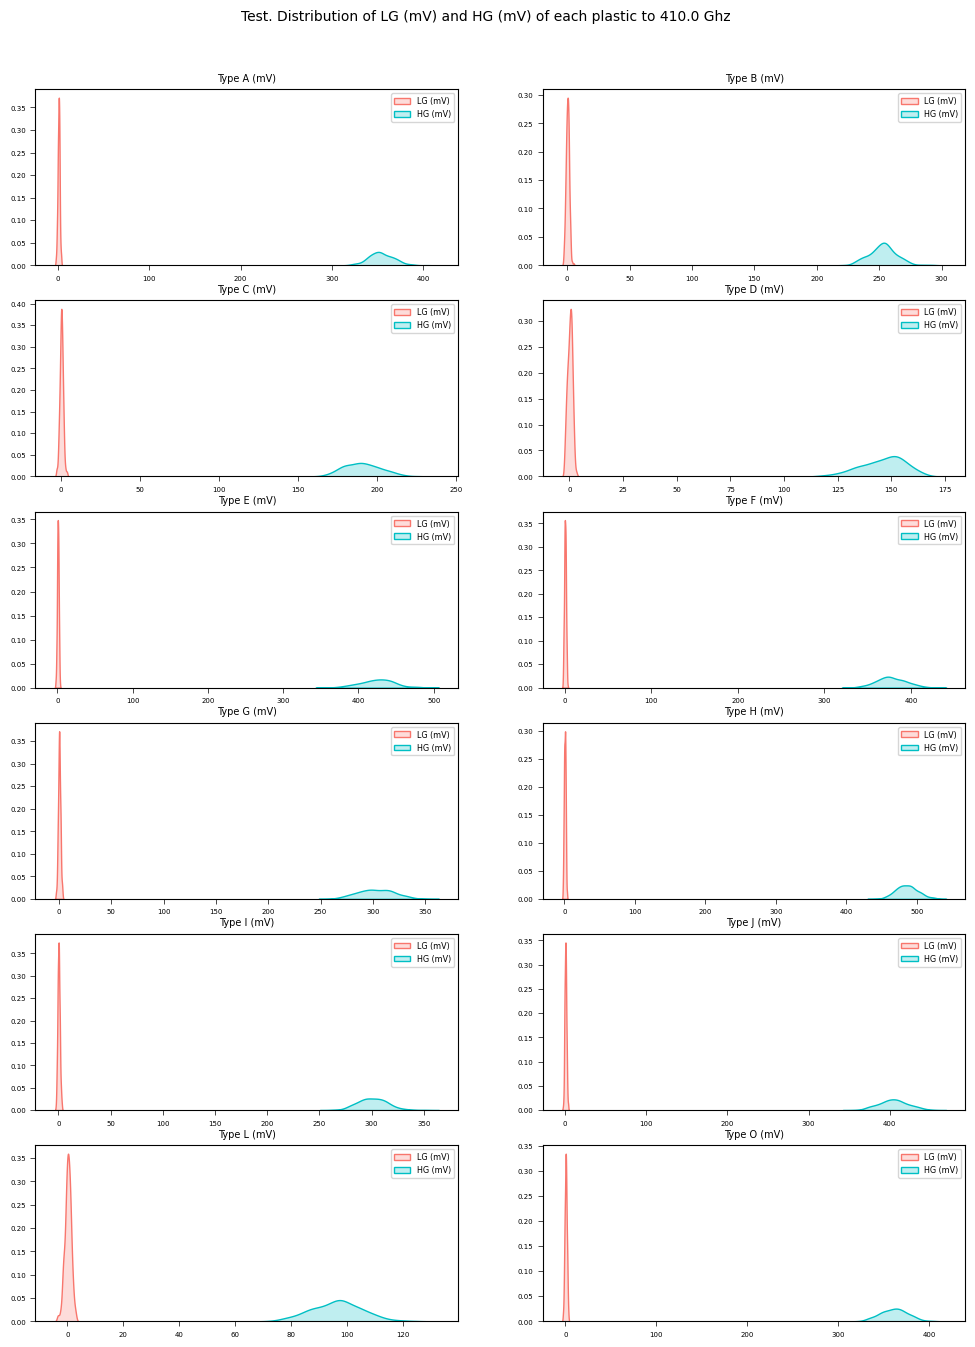

In [22]:
for f in test_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 2
    nrows = 6
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 16))
    for r in range(nrows):
        for c in range (ncols):
            t = test_ex['target'].value_counts().index.sort_values().tolist()
            #t.remove('REF')
            df_tmp = test_ex[(test_ex.freq == freq) & (test_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Test. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

## Study Type of distribution to one frecuency

In [ ]:
for f in [320]:
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r, c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Distributions of density estimation to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()   

#### Summary of the numerical attributes
Compute mean of groups

In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['HG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by HG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:

df_tmp = train_ex[(train_ex.freq == freq)]
grouped = df_tmp['LG (mV)'].groupby(df_tmp['target'])

ax = grouped.mean().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Mean (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()


In [ ]:
ax = grouped.std().plot.bar(figsize=(8, 4), legend=False)
plt.suptitle(f'Standard deviation (mV) by LG filter of each plastic to {freq} Ghz')
ax.set_xlabel(f'Type of plastic')
ax.set_ylabel('mV')
plt.tight_layout()
plt.show()

**Insights**: Assuming a normal distribution can lead to underestimation of extreme events 

#### Predicts that anamolous measures
The tails of a distribution correspond to the extreme values (small and large). Long tails, and guarding against them, are widely recognized in practical work. Nassim Taleb has proposed the black swan theory, which predicts that anamolous events, such as a stock market crash, are much more likely to occur than would be predicted by the normal distribution. 

In [ ]:
from scipy import stats
temp_t = t[13]
fig, ax = plt.subplots(figsize=(4, 4))
df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == temp_t)]
#stats.probplot(df_tmp['LG (mV)'], plot=ax)
stats.probplot(df_tmp['LG (mV)'], plot=ax)

plt.suptitle(f"Sample of {temp_t} data against the quantiles of a specified theoretical distribution {freq} Ghz", y=0.93,fontsize=10)
plt.tight_layout()
plt.show()


**Insights**: The points are far below the line for low values and far 
above the line for high value. Theree are much more likely t 
observe extreme values than would be expected if the data had a norm l
distribution

## Promising transformations you may want to apply
### Apply OrdinalEncoder to transform categorical features as an integer
Target variable takes only a limited number of values. Encode target (categorical features) as an integer array.  
**Question**: How does doing this in the previous phase (Convert the data to a format you can easily manipulate) affect the classifier?

In [33]:
from sklearn.preprocessing import OrdinalEncoder
label_train_ex = train_ex.copy()
label_test_ex = test_ex.copy()
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(train_ex[['target']])
label_train_ex['target'] = ordinal_encoder.transform(train_ex[['target']])
label_test_ex['target'] = ordinal_encoder.transform(test_ex[['target']])

In [ ]:
ordinal_encoder.categories_

### % of missing values
No missing values in each column of training data

In [ ]:
print(label_train_ex.shape)
missing_val_count_by_column = (label_train_ex.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

### Type of distribution in frecuency
Representation of the distribution of nums of sample by frecuency. 

In [ ]:
ax = label_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
plt.tight_layout()int_time
plt.show()

### Balanced samples of frecuency by min

In [34]:
min = label_train_ex.groupby(['target', 'freq']).size().min()
# Function to reduce samples to the min value
def reduce_to_min(df, target, frequency, min):
    # Filter the DataFrame for the specific sample and frequency
    freq_df = df[(df['target'] == target) & (df['freq'] == frequency)]
    # If the number of samples is greater than the min, sample down to the min
    return freq_df.sample(n=min, random_state=42)

# Apply the function to reduce target for each combination of Sample and Frequency (GHz)
tmp_balanced_data = []
for (target, frequency), group in label_train_ex.groupby(['target', 'freq']):
    tmp_balanced_data.append(reduce_to_min(label_train_ex, target, frequency, min))

# Combine the balanced samples into a single DataFrame
balanced_train_ex = pd.concat(tmp_balanced_data)

Check count values within each target and frequency

In [ ]:
ax = balanced_train_ex['freq'].plot.hist(figsize=(10, 4), bins=408)
ax.set_xlabel('Frequency (GHz)')
ax.set_ylabel('Nums of sample by frecuency')
ax.set_title('Distribution by minmial')
plt.tight_layout()
plt.show()

In [ ]:
balanced_train_ex.head() # From 503181 to 218580

In [ ]:
#grouped = balanced_train_ex.groupby([balanced_train_ex["target"], balanced_train_ex["freq"]]).count()

 ## Study the correlations between attributes

Encodes target labels with values between 0 and ``n_classes-1, so `A1` are `0`, `B1` are `1`,... and so on all categories

`A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF`

In [ ]:
balanced_train_ex.head()

It is start to analice PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0`

In [ ]:
df_tmp = balanced_train_ex[balanced_train_ex.target==0]

from pandas.plotting import scatter_matrix
attributes = ['freq', 'LG (mV)', 'HG (mV)']
ax = scatter_matrix(df_tmp[attributes], figsize=(12, 8))

**Insights**: The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the `HG (mV)` value tends to go up slightly when the `Frequency (GHz)` goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a big negative correlation between `LG (mV)` and the `Frequency (GHz)` 

**Evidende**: It can be interpreted that to measured plastic PE/tie/EVOH/tie/PE/Adhesivo/PE/tie/EVOH/tie/PE (0.2mm) `A1` category `0` getaworse response to since high frecuencies in the `LG (mV)`. So the measurement obtained in the low-pass filter is lower `LG (mV)` is better to low frecuencies, although it obtains response peaks at 600 GHz that would have to be explained why they occur


7oat64

In [ ]:
corr_matrix = df_tmp.corr()
corr_matrix['freq'].sort_values(ascending=False)

# Prepare the data to better expose the underlying data patterns

**Doubts**: How does unbalanced test affect to turn out?

In [1]:
#From 503181 to 218580 (or 57936) to apply balanced target samples by min
train_pr = balanced_train_ex.copy() 
test_pr = label_test_ex.copy() # Non balanced from day 1 

test_pr.head()

,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time,target
4607123,250.0,1.220852,323.892093,e5,A1_1,5,0.0
7781748,250.0,0.732511,555.976069,e5,L1_11,5,10.0
6499123,320.0,1.342937,624.954271,e5,G1_7,5,6.0
6190201,330.0,0.854596,1.342964,e5,F1_6,5,5.0
5561019,330.0,-0.854596,548.284674,e5,D1_4,5,3.0


## Data Clean: Remove outliers

In [ ]:
train_ts_low_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.05)
train_ts_high_quan = train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].quantile(0.95)
train_ts_filtering = np.where(train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'] < train_ts_low_quan,
                                train_ts_low_quan,
                                train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'])

train_ts_filtering = pd.Series(train_ts_filtering, index=train_ts[(train_ts.target=='E1')&(train_ts.freq==350.0)]['HG (mV)'].index.to_numpy())
train_ts_filtering = np.where(train_ts_filtering > train_ts_high_quan,
                              train_ts_high_quan,
                              train_ts_filtering)

fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(X, train_ts_filtering)
ax.set_ylim([380, 525])
ax.set_title(' Filtering Outliers of time series of 350 GHz to HG (mV) of plastic type E1')
fig.show()


## Feature engineering
### Discretize continuous features
Bin continuous data into intervals

In [29]:
from sklearn.preprocessing import KBinsDiscretizer

est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
np_hstack_tr = np.array([0])

for f in lst_best_freq:
    np_tr_tmp = train_pr[train_pr.freq==f]['LG (mV)'].values
    idx_tr_tmp = train_pr[train_pr.freq==f]['LG (mV)'].index
    np_te_tmp = test_pr[test_pr.freq==f]['LG (mV)'].values
    idx_te_tmp = test_pr[test_pr.freq==f]['LG (mV)'].index    
    
    est.fit(np_tr_tmp.reshape(-1, 1))
    np_bin_tr_tmp = est.transform(np_tr_tmp.reshape(-1, 1))
    np_bin_inv_tr_tmp = est.inverse_transform(np_bin_tr_tmp)
    np_bin_te_tmp = est.transform(np_te_tmp.reshape(-1, 1))
    np_bin_inv_te_tmp = est.inverse_transform(np_bin_te_tmp)
    
    if np_hstack_tr.all():
        np_hstack_tr = np.hstack((np_hstack_tr, np_bin_inv_tr_tmp.reshape(1, -1)[0]))
        np_idx_hstack_tr = np.hstack((np_idx_hstack_tr, idx_tr_tmp.to_numpy()))
        np_hstack_te = np.hstack((np_hstack_te, np_bin_inv_te_tmp.reshape(1, -1)[0]))
        np_idx_hstack_te = np.hstack((np_idx_hstack_te, idx_te_tmp.to_numpy()))
    else:
        np_hstack_tr = np_bin_inv_tr_tmp.reshape(1, -1)[0]
        np_idx_hstack_tr = idx_tr_tmp.to_numpy()
        np_hstack_te = np_bin_inv_te_tmp.reshape(1, -1)[0]
        np_idx_hstack_te = idx_te_tmp.to_numpy()

df_tr_tmp = pd.DataFrame(
        {"bined_lg" : np_hstack_tr},
        index=np_idx_hstack_tr)
                           
df_te_tmp = pd.DataFrame(
        {"bined_lg" : np_hstack_te},
        index=np_idx_hstack_te)

train_pr_bined = pd.concat([train_pr,df_tr_tmp], axis=1)
test_pr_bined = pd.concat([test_pr,df_te_tmp], axis=1)


,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time,target,bined_lg
4607123,250.0,1.220852,323.892093,e5,A1_1,5,0.0,2.075448
7781748,250.0,0.732511,555.976069,e5,L1_11,5,10.0,-0.024417
6499123,320.0,1.342937,624.954271,e5,G1_7,5,6.0,0.732511
6190201,330.0,0.854596,1.342964,e5,F1_6,5,5.0,1.098767
5561019,330.0,-0.854596,548.284674,e5,D1_4,5,3.0,-0.854597
...,...,...,...,...,...,...,...,...
4615418,320.0,1.098767,604.077649,e5,A1_1,5,0.0,0.732511
6180220,250.0,0.488341,113.417149,e5,F1_6,5,5.0,-0.024417
7465640,330.0,0.610426,388.353109,e5,J1_10,5,9.0,1.098767
7465300,330.0,2.685875,402.514911,e5,J1_10,5,9.0,3.052130


In [32]:
np_hstack_tr = np.array([0])

for f in lst_best_freq:
    np_tr_tmp = train_pr[train_pr.freq==f]['HG (mV)'].values
    idx_tr_tmp = train_pr[train_pr.freq==f]['HG (mV)'].index
    np_te_tmp = test_pr[test_pr.freq==f]['HG (mV)'].values
    idx_te_tmp = test_pr[test_pr.freq==f]['HG (mV)'].index    
    
    est.fit(np_tr_tmp.reshape(-1, 1))
    np_bin_tr_tmp = est.transform(np_tr_tmp.reshape(-1, 1))
    np_bin_inv_tr_tmp = est.inverse_transform(np_bin_tr_tmp)
    np_bin_te_tmp = est.transform(np_te_tmp.reshape(-1, 1))
    np_bin_inv_te_tmp = est.inverse_transform(np_bin_te_tmp)
    
    if np_hstack_tr.all():
        np_hstack_tr = np.hstack((np_hstack_tr, np_bin_inv_tr_tmp.reshape(1, -1)[0]))
        np_idx_hstack_tr = np.hstack((np_idx_hstack_tr, idx_tr_tmp.to_numpy()))
        np_hstack_te = np.hstack((np_hstack_te, np_bin_inv_te_tmp.reshape(1, -1)[0]))
        np_idx_hstack_te = np.hstack((np_idx_hstack_te, idx_te_tmp.to_numpy()))
    else:
        np_hstack_tr = np_bin_inv_tr_tmp.reshape(1, -1)[0]
        np_idx_hstack_tr = idx_tr_tmp.to_numpy()
        np_hstack_te = np_bin_inv_te_tmp.reshape(1, -1)[0]
        np_idx_hstack_te = idx_te_tmp.to_numpy()

df_tr_tmp = pd.DataFrame(
        {"bined_hg" : np_hstack_tr},
        index=np_idx_hstack_tr)
                           
df_te_tmp = pd.DataFrame(
        {"bined_hg" : np_hstack_te},
        index=np_idx_hstack_te)

train_pr_bined = pd.concat([train_pr_bined,df_tr_tmp], axis=1)
test_pr_bined = pd.concat([test_pr_bined,df_te_tmp], axis=1)

,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time,target,bined_lg,bined_hg
4541553,250.0,0.854596,293.248749,e5,A1_1,5,0.0,-0.024417,312.074276
4541768,250.0,1.220852,339.030600,e5,A1_1,5,0.0,2.075448,312.074276
4542724,250.0,1.831278,334.757638,e5,A1_1,5,0.0,2.075448,312.074276
4606599,250.0,0.854596,333.048463,e5,A1_1,5,0.0,-0.024417,312.074276
4542512,250.0,0.610426,341.350269,e5,A1_1,5,0.0,-0.024417,312.074276
...,...,...,...,...,...,...,...,...,...
4227155,330.0,1.068246,48.193145,e4,REF_15,20,12.0,1.098767,85.410840
4199070,330.0,0.763033,0.732511,e4,REF_1,20,12.0,1.098767,85.410840
4199145,330.0,1.098767,0.061041,e4,REF_1,20,12.0,1.098767,85.410840
4227213,330.0,1.495544,38.670528,e4,REF_15,20,12.0,1.098767,85.410840


#### Visualize binded vs real measures

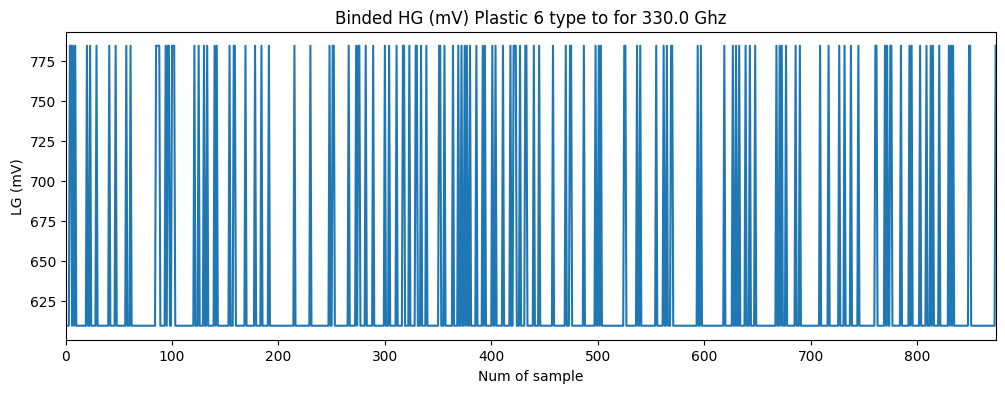

In [33]:
str_filter_pr = 'HG (mV)'
str_bined_filter_pr = 'bined_hg'
np_freq_pr = 330.0
np_target_pr = 6
df_tmp = train_pr_bined[(train_pr_bined.freq==np_freq_pr)&(train_pr_bined.target==np_target_pr)][str_bined_filter_pr]
df_tmp = df_tmp.reset_index()
_ = df_tmp[str_bined_filter_pr].plot(figsize=(12,4), xlim = [0,874],
                ylabel = 'LG (mV)',
                xlabel = 'Num of sample',
                title= 'Binded ' + str_filter_pr + ' Plastic '+ str(np_target_pr) +' type to for ' + str(np_freq_pr) +' Ghz')

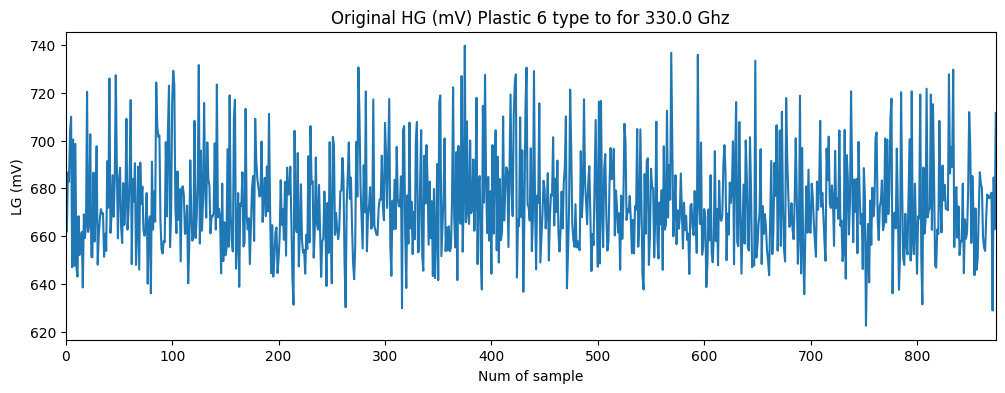

In [35]:

df_tmp = train_pr_bined[(train_pr_bined.freq==np_freq_pr)&(train_pr_bined.target==np_target_pr)][str_filter_pr]
df_tmp = df_tmp.reset_index()
_ = df_tmp[str_filter_pr].plot(figsize=(12,4), xlim = [0,874],
                ylabel = 'LG (mV)',
                xlabel = 'Num of sample',
                title= 'Original ' + str_filter_pr + ' Plastic '+ str(np_target_pr) +' type to for ' + str(np_freq_pr) +' Ghz' )

### Add promising transformations of features

In [ ]:
train_pr = train_pr.astype({"freq": int, "target": int})

#https://stackoverflow.com/questions/43131715/pandas-new-column-by-combining-numbers-of-two-columns-as-strings
train_pr['freq_target'] = train_pr['freq'].astype(str) + train_pr['target'].astype(str)
train_pr['freq_target'].nunique() # train_pr['freq'].nunique() * train_pr['target'].nunique() 765 different measures



In [ ]:
train_pr['freq_target'] = train_pr['freq_target'].astype(int)
#train_pr = train_pr.rename(columns = {'freq':'Frequency (GHz)'})

train_pr.info()

**Doubts**: Normalize freq_target?

## Add transformations of features

#### Check smallest, largest, and zeros before to aggregate new features

In [ ]:
#Find out if zeros before to Aggregate features
df_temp = train_pr.rename(columns={'LG (mV)': 'LG_mV','HG (mV)': 'HG_mV' })
df_temp[df_temp.LG_mV==0] # 55657 zeros
df_temp[df_temp.HG_mV==0] # 15316 zeros

In [ ]:
np_lg_smallest = train_pr.nsmallest(1,'LG (mV)')['LG (mV)'].values[0] # -49.810767	
np_hg_smallest = train_pr.nsmallest(1,'HG (mV)')['HG (mV)'].values[0] # -16.969845
np_lg_largest = train_pr.nlargest(1,'LG (mV)')['LG (mV)'].values[0] # 274.813829	
np_hg_largest =train_pr.nlargest(1,'HG (mV)')['HG (mV)'].values[0] # 1149.43229
print (f"Train:\nSmallest values LG:{np_lg_smallest}, HG:{np_hg_smallest}\nLargest values LG:{np_lg_largest}, HG:{np_hg_largest}\n")

np_lg_smallest = test_pr.nsmallest(1,'LG (mV)')['LG (mV)'].values[0] # -49.810767	
np_hg_smallest = test_pr.nsmallest(1,'HG (mV)')['HG (mV)'].values[0] # -16.969845
np_lg_largest = test_pr.nlargest(1,'LG (mV)')['LG (mV)'].values[0] # 274.813829	
np_hg_largest = test_pr.nlargest(1,'HG (mV)')['HG (mV)'].values[0] # 1149.43229
print (f"Test:\nSmallest values LG:{np_lg_smallest}, HG:{np_hg_smallest}\nLargest values LG:{np_lg_largest}, HG:{np_hg_largest}\n")

Slide all values to remove zeros and Aggregate features into promising new features

In [ ]:
train_pr.nsmallest(1,'HG_div_LG')['HG_div_LG'].values[0] # 0.264913931
train_pr.nlargest(1,'HG_div_LG')['HG_div_LG'].values[0] # 12.45292894


**TODO**: Round the smallest values, change sign and add to `apply(lambda x: np.sum([x, 10]`

#### Aggregate features into promising new features: HG_div_LG

In [ ]:
train_pr['LG (mV)_shifted'] = train_pr['LG (mV)'].apply(lambda x: np.sum([x, 10]))
train_pr['HG (mV)_shifted'] = train_pr['HG (mV)'].apply(lambda x: np.sum([x, 10]))
train_pr['HG_div_LG'] = train_pr['HG (mV)_shifted']/train_pr['LG (mV)_shifted']
#train_pr.info()

test_pr['LG (mV)_shifted'] = test_pr['LG (mV)'].apply(lambda x: np.sum([x, 10]))
test_pr['HG (mV)_shifted'] = test_pr['HG (mV)'].apply(lambda x: np.sum([x, 10]))
test_pr['HG_div_LG'] = test_pr['HG (mV)_shifted']/test_pr['LG (mV)_shifted']

#### Aggregate features into promising new features: descriptive statistics for each freq

In [ ]:
#Create train_pr_stats
grouped = train_pr.groupby(train_pr["freq"])
grouped_LG_mV = grouped['LG (mV)']
grouped_HG_mV = grouped['HG (mV)']
# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
df_grouped_LG_mV = grouped_LG_mV.agg(['mean','std','var','median']).reset_index(level=[0])
df_grouped_HG_mV = grouped_HG_mV.agg(['mean','std','var','median']).reset_index(level=[0])

# df_grouped_LG_mV.head()

train_pr_shifted = train_pr.copy()
train_pr_shifted = train_pr.drop(columns=['LG (mV)_shifted', 'HG (mV)_shifted'])
# train_pr_shifted.head()


train_pr_stats = pd.merge(train_pr_shifted, df_grouped_LG_mV, how='left', on='freq').rename(columns = {'mean':'mean_LG',
                                                                                                       'std':'std_LG',
                                                                                                       'var':'var_LG',
                                                                                                       'median':'median_LG'})
train_pr_stats = pd.merge(train_pr_stats, df_grouped_HG_mV, how='left', on='freq').rename(columns = {'mean':'mean_HG', 
                                                                                                     'std': 'std_HG',
                                                                                                     'var':'var_HG',
                                                                                                     'median':'median_HG'})


In [ ]:
#train_pr_stats.tail()
train_pr_stats.info() #218580 (or 57936)

In [ ]:
#Create test_pr_stats
grouped = test_pr.groupby(test_pr["freq"])
grouped_LG_mV = grouped['LG (mV)']
grouped_HG_mV = grouped['HG (mV)']
# https://stackoverflow.com/questions/32938060/reverting-from-multiindex-to-single-index-dataframe-in-pandas
df_grouped_LG_mV = grouped_LG_mV.agg(['mean','std','var','median']).reset_index(level=[0])
df_grouped_HG_mV = grouped_HG_mV.agg(['mean','std','var','median']).reset_index(level=[0])

# df_grouped_LG_mV.head()

test_pr_shifted = test_pr.copy()
test_pr_shifted = test_pr.drop(columns=['LG (mV)_shifted', 'HG (mV)_shifted'])
# test_pr_shifted.head()


test_pr_stats = pd.merge(test_pr_shifted, df_grouped_LG_mV, how='left', on='freq').rename(columns = {'mean':'mean_LG',
                                                                                                       'std':'std_LG',
                                                                                                       'var':'var_LG',
                                                                                                       'median':'median_LG'})
test_pr_stats = pd.merge(test_pr_stats, df_grouped_HG_mV, how='left', on='freq').rename(columns = {'mean':'mean_HG', 
                                                                                                     'std': 'std_HG',
                                                                                                     'var':'var_HG',
                                                                                                     'median':'median_HG'})


In [ ]:
test_pr_stats.info() # 20333

#### Aggregate features into promising new features: LG_div_REF and HG_div_REF

In [ ]:
grouped_B1 = train_pr_stats[train_pr_stats.target == 0.0].groupby(train_pr_stats[train_pr_stats.target == 0.0]['freq'])
df_mean_B1 = grouped_B1['LG (mV)'].agg('mean')
grouped_C1 = train_pr_stats[train_pr_stats.target == 1.0].groupby(train_pr_stats[train_pr_stats.target == 1.0]['freq'])
df_mean_C1 = grouped_C1['LG (mV)'].agg('mean')
grouped_E1 = train_pr_stats[train_pr_stats.target == 2.0].groupby(train_pr_stats[train_pr_stats.target == 2.0]['freq'])
df_mean_E1 = grouped_E1['LG (mV)'].agg('mean')
grouped_ref = train_pr_stats[train_pr_stats.target == 3.0].groupby(train_pr_stats[train_pr_stats.target == 3.0]['freq'])
df_mean_ref = grouped_ref['LG (mV)'].agg('mean')

df_LG_div_REF = pd.DataFrame(
    {"LG_B1_div_REF": df_mean_B1.values/df_mean_ref.values,
     "LG_C1_div_REF": df_mean_C1.values/df_mean_ref.values,
     "LG_E1_div_REF": df_mean_E1.values/df_mean_ref.values},
    index = df_mean_ref.index)

grouped_B1 = train_pr_stats[train_pr_stats.target == 0.0].groupby(train_pr_stats[train_pr_stats.target == 0.0]['freq'])
df_mean_B1 = grouped_B1['HG (mV)'].agg('mean')
grouped_C1 = train_pr_stats[train_pr_stats.target == 1.0].groupby(train_pr_stats[train_pr_stats.target == 1.0]['freq'])
df_mean_C1 = grouped_C1['HG (mV)'].agg('mean')
grouped_E1 = train_pr_stats[train_pr_stats.target == 2.0].groupby(train_pr_stats[train_pr_stats.target == 2.0]['freq'])
df_mean_E1 = grouped_E1['HG (mV)'].agg('mean')
grouped_ref = train_pr_stats[train_pr_stats.target == 3.0].groupby(train_pr_stats[train_pr_stats.target == 3.0]['freq'])
df_mean_ref = grouped_ref['HG (mV)'].agg('mean')


df_HG_div_REF = pd.DataFrame(
    {"HG_B1_div_REF": df_mean_B1.values/df_mean_ref.values,
     "HG_C1_div_REF": df_mean_C1.values/df_mean_ref.values,
     "HG_E1_div_REF": df_mean_E1.values/df_mean_ref.values},
    index = df_mean_ref.index)

train_pr_stats_div_ref = pd.merge(train_pr_stats, df_LG_div_REF, how='left', on='freq')
train_pr_stats_div_ref = pd.merge(train_pr_stats_div_ref, df_HG_div_REF, how='left', on='freq')
train_pr_stats_div_ref.info()

## Feature scaling standardize
### Check if Feature Scaling is an important preprocessing step

In [4]:
train_pr_stats.head() 

,freq,LG (mV),HG (mV),num_experiment,Sample_original,int_time,target,HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
0,250.0,2.319619,329.263830,e5,A1_1,5,0.0,27.538500,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
1,250.0,2.930045,327.676725,e5,A1_1,5,0.0,26.115665,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
2,250.0,1.831278,333.414745,e5,A1_1,5,0.0,29.026006,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
3,250.0,2.197534,303.015494,e5,A1_1,5,0.0,25.662195,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
4,250.0,2.319619,329.019713,e5,A1_1,5,0.0,27.518685,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846


**Doubt**: `fit` and them `transform` vs `fit_transform`

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().set_output(transform="pandas")
train_pr_feats = train_pr_stats.drop(columns=['target', 'freq', 'num_experiment', 'Sample_original', 'int_time'])
train_pr_feats_scaled = scaler.fit_transform(train_pr_feats)

test_pr_feats = test_pr_stats.drop(columns=['target', 'freq', 'num_experiment', 'Sample_original', 'int_time'])
test_pr_feats_scaled = scaler.fit_transform(test_pr_feats)

,LG (mV),HG (mV),HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
0,2.319619,329.263830,27.538500,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
1,2.930045,327.676725,26.115665,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
2,1.831278,333.414745,29.026006,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
3,2.197534,303.015494,25.662195,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
4,2.319619,329.019713,27.518685,1.304126,1.242248,1.543179,1.342937,458.499206,309.549513,95820.901103,430.960846
...,...,...,...,...,...,...,...,...,...,...,...
46223,-0.610426,307.105373,33.772072,0.360044,1.088714,1.185298,0.366256,321.023450,114.187830,13038.860435,357.770741
46224,0.946160,293.553923,27.731544,0.360044,1.088714,1.185298,0.366256,321.023450,114.187830,13038.860435,357.770741
46225,0.671469,309.241875,29.915457,0.360044,1.088714,1.185298,0.366256,321.023450,114.187830,13038.860435,357.770741
46226,0.122085,368.849947,37.428054,0.360044,1.088714,1.185298,0.366256,321.023450,114.187830,13038.860435,357.770741


In [ ]:
from sklearn.decomposition import PCA

train_pr_pca = PCA(n_components=2).fit(train_pr_feats.to_numpy())
train_pr_pca_scaled = PCA(n_components=2).fit(train_pr_feats_scaled.to_numpy()) 

test_pr_pca = PCA(n_components=2).fit(test_pr_feats.to_numpy())
test_pr_pca_scaled = PCA(n_components=2).fit(test_pr_feats_scaled.to_numpy())
print(f"Train variance lies along the first and second axis: {train_pr_pca_scaled.explained_variance_ratio_}")

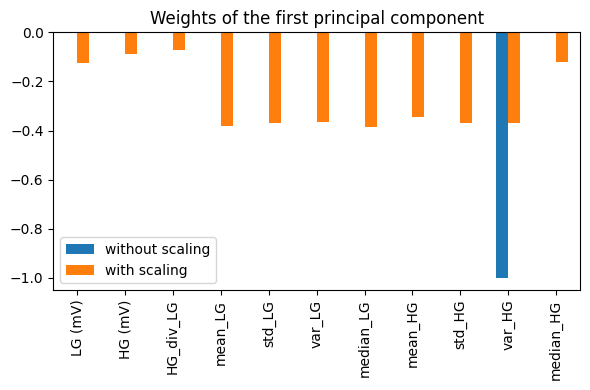

In [3]:

first_pca_component = pd.DataFrame(
    train_pr_pca.components_[0], index=train_pr_feats.columns, columns=["without scaling"]
)
first_pca_component["with scaling"] = train_pr_pca_scaled.components_[0]
first_pca_component.plot.bar(
    title="Weights of the first principal component", figsize=(6, 4)
)

_ = plt.tight_layout()

In [ ]:
train_pr_pca_feats_scaled = PCA(n_components=2).fit_transform(train_pr_feats_scaled.to_numpy()) 
train_pr_pca_feats_scaled = pd.DataFrame(train_pr_pca_feats_scaled,
                  index=train_pr_feats_scaled.index,
                  columns =['feats_pca_1', 'feats_pca_2'])

test_pr_pca_feats_scaled = PCA(n_components=2).fit_transform(test_pr_feats_scaled.to_numpy()) 
test_pr_pca_feats_scaled = pd.DataFrame(test_pr_pca_feats_scaled,
                  index=test_pr_feats_scaled.index,
                  columns =['feats_pca_1', 'feats_pca_2'])

In [ ]:
#train_pr_feats_scaled.head()
train_pr_scaled = pd.concat([train_pr_feats_scaled, train_pr_stats[['target', 'freq', 'num_experiment', 'Sample_original', 'int_time']]], axis=1)
train_pr_pca_feats_scaled = pd.concat([train_pr_pca_feats_scaled, train_pr_stats[['target', 'freq', 'num_experiment', 'Sample_original', 'int_time']]], axis=1)

#test_pr_feats_scaled.head()
test_pr_scaled = pd.concat([test_pr_feats_scaled, test_pr_stats[['target', 'freq', 'num_experiment', 'Sample_original', 'int_time']]], axis=1)
test_pr_pca_feats_scaled = pd.concat([test_pr_pca_feats_scaled, test_pr_stats[['target', 'freq', 'num_experiment', 'Sample_original', 'int_time']]], axis=1)



# Explore different models

In [ ]:
#Remove REF. Check if is the last category
lst_tmp = ordinal_encoder.categories_[0].tolist()
n = len(lst_tmp)-1
lst_tmp[n]

In [ ]:
train_mo = train_pr_scaled.copy() #163935 (or 57936)
train_mo = train_mo[train_mo.target != n] # From 218580 to 163935 (or 43452) by remove REF
train_mo['target'].value_counts()

In [3]:
test_mo = test_pr_scaled.copy()
test_mo = test_mo[test_mo.target != n]
#test_mo['target'].value_counts()


freq
250.0    3179
320.0    3167
330.0    3154
410.0    3115
Name: count, dtype: int64

In [ ]:
train_mo = train_mo.copy().drop(columns=['num_experiment', 'Sample_original', 'int_time'])
test_mo = test_mo.copy().drop(columns=['num_experiment', 'Sample_original', 'int_time']) #15133 rows x 13 columns or 12615 rows x 13 columns
#train_mo = train_mo.copy().drop(columns=['LG_B1_div_REF', 'LG_C1_div_REF', 'LG_E1_div_REF', 'HG_B1_div_REF', 'HG_C1_div_REF', 'HG_E1_div_REF'])
train_mo.head()


In [ ]:
#train_mo = train_mo[train_mo.freq==420]
#test_mo = test_mo[test_mo.freq==420]

In [ ]:
ax = train_mo[['target']].value_counts().transpose().plot.bar(figsize=(8, 4), legend=False)
ax.set_xlabel('Data Distribution of target for train ')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

The validation set `X_va` and `y_va` is used during the training phase of the model to provide an unbiased evaluation of the model's performance and to fine-tune the model's parameters.

In [ ]:
train_ex_orig = train_ex.copy()
train_ex = train_mo.copy().drop(columns=['target', 'freq', 'num_experiment', 'HG_div_LG'])
train_ex.info()

In [ ]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

for f in train_ex['freq'].value_counts().index.sort_values().tolist():
    freq = f
    ncols = 5
    nrows = 3
    nums_plastics = 0
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
    for r in range(nrows):
        for c in range (ncols):
            t = train_ex['target'].value_counts().index.sort_values().tolist()
            df_tmp = train_ex[(train_ex.freq == freq) & (train_ex.target == t[nums_plastics])]
            sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
            sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
            axes[r ,c].legend(fontsize="xx-small")
            axes[r, c].set_ylabel('')
            axes[r, c].set_xlabel('')
            axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
            axes[r, c].tick_params(labelsize=5, width=0.5)
            axes[r, c].xaxis.offsetText.set_fontsize(6)
            axes[r, c].yaxis.offsetText.set_fontsize(4)
            nums_plastics = nums_plastics +1
    plt.suptitle(f"Train Model samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
    plt.show()        

In [ ]:
train_ex = train_ex_orig.copy()
del train_ex_orig

In [20]:
from sklearn.model_selection import train_test_split

#train_mo_fs_RFE get from 'Have a quick round of feature selection and engineering'
train_set, validate_set = train_test_split(train_mo, test_size=0.2, random_state=42)
test_set = test_mo.copy()

y_tr = train_set.target
y_va = validate_set[['target']]
y_te = test_set[['target']]

X_tr_freq_target = train_set.copy()
X_tr = train_set.drop(columns=['target', 'freq'])
X_te = test_set.drop(columns=['target', 'freq'])

X_va_freq_target = validate_set.copy()
X_va = validate_set.drop(columns=[ 'target', 'freq'])
X_te_freq_target = test_set.copy()

## Train many quick and dirty models 

In [ ]:
import time
start_time = time.time()

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent").fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = dummy_clf.predict(X_va.to_numpy())

from sklearn.metrics import accuracy_score
dummy_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit_clf = LogisticRegression().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = logit_clf.predict(X_va.to_numpy())
logit_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = sgd_clf.predict(X_va.to_numpy())
sgd_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [ ]:
from sklearn.svm import SVC
svc_clf = SVC().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = svc_clf.predict(X_va.to_numpy())
svc_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [ ]:
svc_score_scaled = 0

In [ ]:
bayes_score=0
from sklearn.naive_bayes import MultinomialNB
#bayes_clf = MultinomialNB().fit(X_tr.to_numpy(), y_tr.to_numpy())
#bayes_score = accuracy_score(y_va.target.to_numpy(), y_pred)

# ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
from sklearn.linear_model import RidgeClassifier
ridge_clf = RidgeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = ridge_clf.predict(X_va.to_numpy())
ridge_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh_clf = KNeighborsClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = neigh_clf.predict(X_va.to_numpy())
neigh_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_neigh = y_pred.copy()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = tree_clf.predict(X_va.to_numpy())
tree_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_tree = y_pred.copy()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = rnd_clf.predict(X_va.to_numpy())
rnd_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_rnd = y_pred.copy()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier().fit(X_tr.to_numpy(), y_tr.to_numpy())
y_pred = gb_clf.predict(X_va.to_numpy())
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)
y_pred_gb = y_pred.copy()

In [ ]:
#15 types and 51 freqs with train_pr_scaled with 10950 samples 1357.91sg
#15 types and 14 freqs with train_pr_scaled with 11494 samples 1017.84sg
#15 types and 4 freqs (320.0, 250.0, 330.0, 410.0) with train_pr_scaled with 3556 samples 124.13sg
run_time = time.time() - start_time
print(f"Run Time: {run_time:.2f}s")


In [42]:
lst_accuracy_score = [bayes_score, dummy_score, gb_score, logit_score, neigh_score, ridge_score, rnd_score, sgd_score, svc_score, svc_score_scaled, tree_score]
lst_name_clf = ['bayes', 'dummy', 'gb', 'logit', 'neigh', 'ridge', 'rnd', 'sgd', 'svc', 'svc_scaled', 'tree' ]


df_scores_tr = pd.DataFrame({
"name_clf" : lst_name_clf,
"accuracy_score" : lst_accuracy_score
})

df_scores_tr.sort_values(by='accuracy_score',ascending = False)

,name_clf,accuracy_score
8,svc,0.627651
6,rnd,0.614177
4,neigh,0.613943
2,gb,0.592501
10,tree,0.592501
3,logit,0.220504
7,sgd,0.164265
5,ridge,0.156298
1,dummy,0.076860
0,bayes,0.000000


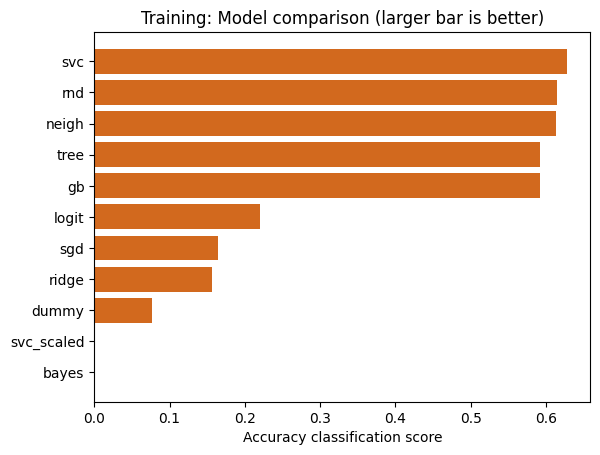

In [43]:
df_scores_tr.sort_values('accuracy_score', ascending=True, inplace=True)
plt.barh(np.arange(len(lst_name_clf)), df_scores_tr.accuracy_score, color='chocolate')
plt.yticks(np.arange(len(lst_name_clf)), df_scores_tr.name_clf)
#plt.xlim(0, 1.2)
plt.title('Training: Model comparison (larger bar is better)')
plt.xlabel('Accuracy classification score')
plt.show()

In [ ]:
df_scores_tr['accuracy_score'].tolist()

In [ ]:
stop

## Measure and compare classifiers performance and frecuencies

`neigh`, `rnd`, `gb` and `tree` get the best score

### Cross-validation
Statistical method to evaluate generalization performance in a more stable and thorough way than using a split into training and test set.


In [1]:
X_te.head()

,LG (mV),HG (mV),HG_div_LG,mean_LG,std_LG,var_LG,median_LG,mean_HG,std_HG,var_HG,median_HG
0,-0.967490,-0.292325,-0.167929,0.537254,0.195922,0.172256,0.643142,-1.155334,0.327450,0.209537,-1.517134
1,-1.159725,-0.209608,-0.042660,-1.680793,-1.411960,-1.387673,-1.634577,-0.774590,-1.633515,-1.534078,-0.278729
2,-1.159725,1.489727,1.857140,0.173643,-0.204323,-0.227962,-0.007634,0.625601,0.172484,0.022634,0.912423
3,-0.390786,1.684669,1.747247,0.537254,0.195922,0.172256,0.643142,-1.155334,0.327450,0.209537,-1.517134
4,-1.736429,1.179174,1.756542,0.939452,1.391069,1.414299,0.968530,1.289288,1.103287,1.271992,0.879277


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score
#Run Time: 531.77s to 3, 4 CV

start_fold = 3
finish_fold = 5

lst_cv_neigh_tr, lst_cv_rnd_tr, lst_cv_gb_tr, lst_cv_tree_tr = [], [], [], []
lst_cv_neigh_va, lst_cv_rnd_va, lst_cv_gb_va, lst_cv_tree_va = [], [], [], []
lst_cv_neigh_te, lst_cv_rnd_te, lst_cv_gb_te, lst_cv_tree_te = [], [], [], []

start_time = time.time()


for cv in np.arange(start_fold,finish_fold,1):
    scores = cross_validate(neigh_clf, X_tr, y_tr, cv=cv, return_train_score=True)
    lst_cv_neigh_tr.append(scores['train_score'])
    lst_cv_neigh_va.append(scores['test_score'])
    
    scores_te = cross_val_score(neigh_clf, X_te, y_te, cv=cv)
    lst_cv_neigh_te.append(scores_te)
    #print (f"Neigh\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()}\nscores: {scores}")
    
    scores = cross_validate(rnd_clf, X_tr, y_tr, cv=cv, return_train_score=True)
    lst_cv_rnd_tr.append(scores['train_score'])
    lst_cv_rnd_va.append(scores['test_score'])

    scores_te = cross_val_score(rnd_clf, X_te, y_te, cv=cv)
    lst_cv_rnd_te.append(scores_te)
    #print (f"Rnd\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()})\nscores: {scores}")
    
    scores = cross_validate(gb_clf, X_tr, y_tr, cv=cv, return_train_score=True)
    lst_cv_gb_tr.append(scores['train_score'])
    lst_cv_gb_va.append(scores['test_score'])
    
    scores_te = cross_val_score(gb_clf, X_te, y_te, cv=cv)
    lst_cv_gb_te.append(scores_te)    
    #print (f"gb\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()})\nscores: {scores}")
    
    scores = cross_validate(tree_clf, X_tr, y_tr, cv=cv, return_train_score=True) 
    lst_cv_tree_tr.append(scores['train_score'])
    lst_cv_tree_va.append(scores['test_score'])

    scores_te = cross_val_score(tree_clf, X_te, y_te, cv=cv)
    lst_cv_tree_te.append(scores_te)
    #print (f"tree\t cv:{cv}, Std:{scores.std()}, Mean:{scores.mean()})\nscores: {scores}")
    
    print(f"CV:{cv} ended")

run_time = time.time() - start_time
print(f"Run Time: {run_time:.2f}s")

In [ ]:

n_fold_to_plot = 4


n_fold = n_fold_to_plot - start_fold
df_cv_neigh = pd.DataFrame(
    {"train":lst_cv_neigh_tr[n_fold],
     "val": lst_cv_neigh_va[n_fold],
     "test": lst_cv_neigh_te[n_fold]})
df_cv_neigh['n_fold'] = df_cv_neigh.index
df_cv_neigh['model'] = 'neigh'

df_cv_rnd = pd.DataFrame(
    {"train":lst_cv_rnd_tr[n_fold],
     "val": lst_cv_rnd_va[n_fold],
     "test": lst_cv_rnd_te[n_fold]})
df_cv_rnd['n_fold'] = df_cv_rnd.index
df_cv_rnd['model'] = 'rnd'

df_cv_gb = pd.DataFrame(
    {"train":lst_cv_gb_tr[n_fold],
     "val": lst_cv_gb_va[n_fold],
     "test": lst_cv_gb_te[n_fold]})
df_cv_gb['n_fold'] = df_cv_gb.index
df_cv_gb['model'] = 'gb'

df_cv_tree = pd.DataFrame(
    {"train":lst_cv_tree_tr[n_fold],
     "val": lst_cv_tree_va[n_fold],
     "test": lst_cv_tree_te[n_fold]})
df_cv_tree['n_fold'] = df_cv_tree.index
df_cv_tree['model'] = 'tree'

In [ ]:
df_cv_tree
df_cv_tree[['train', 'val', 'test']].mean()

In [ ]:
df_cv_total = pd.concat([df_cv_neigh, df_cv_rnd, df_cv_gb, df_cv_tree]).reset_index().drop(columns=['index'])
df_cv_total['n_fold']  = df_cv_total['n_fold'] + 1
df_cv_total[['train', 'val', 'n_fold', 'model']].sort_values(by='val', ascending = False)


## Analyze the types of errors the models make

`tree`, `gb`, `neih` and `rnd` get the best score

**Doubt**: Does `train_mo.columns.tolist()` belong to `clf.feature_importances_`?

In [ ]:
#The importance of a feature is computed as the (normalized)
df_tmp = pd.DataFrame({
    "RandomForest": rnd_clf.feature_importances_,
    #"KNeighbors": neigh_clf.feature_importances_,
    "GradientBoosting": gb_clf.feature_importances_,
    "DecisionTree": tree_clf.feature_importances_},
    index=train_mo.columns.tolist()[2:])
_ = df_tmp.plot.bar(title="Importance of a feature for all frecuencies")


In [ ]:
mat_y_pred_tr = np.mat([y_pred_gb, y_pred_neigh, y_pred_rnd, y_pred_tree])
np_y_tr = y_tr.values
mat_y_pred_tr[0][0]
np.add()

In [ ]:
y_tr_sol = y_tr.copy() 
y_tr_sol['y_pred'] = y_pred 
y_tr_sol['true_pred'] = np.where(y_tr_sol['y_pred'] == y_tr_sol['target'],1,0)

X_tr_freq = pd.concat([y_tr_sol,X_tr_freq_target[['freq']]], axis=1)
X_tr_freq.head()

In [ ]:

df_tmp = pd.DataFrame(
    {"False": X_tr_freq[X_tr_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_tr_freq[X_tr_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_tr_freq[X_tr_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']

Study best classifier to best frequency

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

In [ ]:
train_mo = train_pr_shifted.copy().rename(columns = {'Frequency (GHz)':'freq'})
train_mo_350 = train_mo[train_mo.freq == 350].drop(columns=['freq_target']) 
train_mo_350.info()

In [ ]:
train_mo_350['exp(HG)'] = train_mo_350['HG (mV)'].apply(lambda x: np.expm1(x/1000))
train_mo_350.head()

Binning, Discretization, Linear Models, and Trees

In [ ]:
warnings.filterwarnings('ignore')
freq = 350
ncols = 5
nrows = 3
nums_plastics = 0

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 8))
for r in range(nrows):
    for c in range (ncols):
        t = train_mo_350['target'].value_counts().index.sort_values().tolist()
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[nums_plastics])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[nums_plastics]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        nums_plastics = nums_plastics +1
plt.suptitle(f"All samples. Distribution of LG (mV) and HG (mV) of each plastic to {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_set_350, validate_set_350 = train_test_split(train_mo_350, test_size=0.2, random_state=42)

y_tr_350 = train_set_350.target
y_va_350 = validate_set_350[['target']]

X_tr_350 = train_set_350.drop(columns=['target'])
X_va_350 = validate_set_350.drop(columns=['target'])
X_tr_350.info()

In [ ]:
neigh_clf_350 = KNeighborsClassifier().fit(X_tr_350.to_numpy(), y_tr_350.to_numpy())
y_pred_350 = neigh_clf_350.predict(X_va_350.to_numpy())
neigh_score_350 = accuracy_score(y_va_350.target.to_numpy(), y_pred_350) #0.5896686159844055

In [ ]:

cm = confusion_matrix(y_va_350.target.to_numpy(), y_pred_350, labels=neigh_clf_350.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=neigh_clf_350.classes_)
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Confusion Matrix to k-nearest neighbor to 350 Ghz')
disp.plot(ax=ax)

Columns are type produced and rows are type preceved. 

* `Type 0`: 256 samples are produced and perceived well. 97 are perceived like type 2, 48 samples as type 4, and so on
* `Type 1`: 261 samples are produced and perceived well. 173 are perceived like type 9, 43 samples as type 12, and so on
* etc.

In [ ]:
freq = 350
ncols = 2
nrows = 10
i = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 28))
for r in range(nrows):
    for c in range (ncols):
        t = [0, 2, 0, 7, 1, 9, 1, 14, 2, 4, 4, 8, 5, 12, 8, 13, 9, 14, 12, 14]
        df_tmp = train_mo_350[(train_mo_350.freq == freq) & (train_mo_350.target == t[i])]
        sns.kdeplot(x=df_tmp['LG (mV)'], ax=axes[r, c], color='#F8766D', label='LG (mV)',  fill =True )
        sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)',  fill =True )
        #sns.kdeplot(x=df_tmp['HG (mV)'], ax=axes[r, c], color='#00BFC4', label='HG (mV)x2',  fill =True )
        axes[r ,c].legend(fontsize="xx-small")
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel('')
        axes[r, c].set_title(f"Type {t[i]} (mV)",fontsize=7)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
        i = i + 1
plt.suptitle(f"Major mistakes produced and preceved of each plastic at {freq} Ghz", y=0.93,fontsize=10)
plt.show()   

In [ ]:
train_mo_350_t12 = train_mo_350[train_mo_350.target==12]['HG (mV)']
sns.kdeplot(train_mo_350_t12,color='#00BFC4', label='HG (mV)', fill =True)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kb = KBinsDiscretizer(n_bins=5, strategy='quantile', encode='onehot-dense')
kb.fit(train_mo_350_t12.values.reshape(-1, 1))
train_mo_350_binned = kb.transform(train_mo_350_t12.values.reshape(-1, 1))
kb.bin_edges_[0]

In [ ]:
temp = np.array([1,2,3])
temp.reshape(-1, 1)
temp.reshape(1, -1)

np.random.random((1,10))[0]

## Have a quick round of feature selection and engineering
To improve estimators’ accuracy scores or to boost their performance high-dimensional features datasets

In [ ]:
from sklearn.feature_selection import RFE
n_features_to_select = 5
selector_rnd = RFE(rnd_clf, n_features_to_select=n_features_to_select, step=1)
selector_rnd = selector.fit(X_tr.to_numpy(), y_tr.to_numpy())
selector_gb = RFE(gb_clf, n_features_to_select=n_features_to_select, step=1)
selector_gb = selector.fit(X_tr.to_numpy(), y_tr.to_numpy())
selector_tree = RFE(tree_clf, n_features_to_select=n_features_to_select, step=1)
selector_tree = selector.fit(X_tr.to_numpy(), y_tr.to_numpy())

In [ ]:
df_temp = pd.DataFrame({
    "Feature": X_tr.columns.tolist(),
    "Random_Forest": selector_rnd.ranking_,
    "Gradient_Boost": selector_gb.ranking_,
    "Decision_Tree": selector_tree.ranking_})
df_temp['Total_Rank'] = df_temp["Random_Forest"] + df_temp["Gradient_Boost"] + df_temp["Decision_Tree"]
df_temp.sort_values(by='Total_Rank', ascending=True, inplace=True)

In [ ]:
lst_low_ranking_RFE = df_temp["Feature"].tolist()[5:]

In [ ]:
train_mo_fs_RFE = train_mo.drop(columns=lst_low_ranking_RFE)
test_mo_fs_RFE = test_mo.drop(columns=lst_low_ranking_RFE)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_mo_fs_RFE[['LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_HG', 'std_HG']].to_numpy())
np_train_mo_scaled = scaler.transform(train_mo_fs_RFE[['LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_HG', 'std_HG']].to_numpy())
np_test_mo_scaled = scaler.transform(test_mo_fs_RFE[['LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_HG', 'std_HG']].to_numpy())

train_mo_fs_scaled = pd.DataFrame(np_train_mo_scaled,
                              index=train_mo_fs_RFE.index.tolist(),
                              columns=['LG (mV)_scaled', 'HG (mV)_scaled', 'HG_div_LG_scaled', 'mean_HG_scaled', 'std_HG_scaled'])
train_mo_fs_scaled = pd.concat([train_mo_fs_RFE,train_mo_fs_scaled],axis=1).drop(columns=['LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_HG', 'std_HG'])


test_mo_fs_scaled = pd.DataFrame(np_test_mo_scaled,
                              index=test_mo_fs_RFE.index.tolist(),
                              columns=['LG (mV)_scaled', 'HG (mV)_scaled', 'HG_div_LG_scaled', 'mean_HG_scaled', 'std_HG_scaled'])
test_mo_fs_scaled = pd.concat([test_mo_fs_RFE,test_mo_fs_scaled],axis=1).drop(columns=['LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_HG', 'std_HG'])

In [ ]:
train_mo_fs_RFE[['LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_HG', 'std_HG']].describe()

In [ ]:
(252.472235-2.659186)/15.072857

In [ ]:
train_mo_fs_scaled[['LG (mV)_scaled', 'HG (mV)_scaled', 'HG_div_LG_scaled', 'mean_HG_scaled', 'std_HG_scaled']].describe()

## Quick iterations of the previous steps

# Fine-tune the classifiers
## Fine-tune the hyperparameters
Finding the values of the important parameters of a model to provide the best 
generalization performanc to `neigh`, `rnd`, `gb` and `tree` get the best score)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#RandomizedSearchCV()
#GridSearchCV()
param_grid = {'weights':('uniform', 'distance'), 'n_neighbors': np.arange(5, 10, 1)}
neigh_clf = GridSearchCV(neigh_clf,param_grid, cv=3)
neigh_search = neigh_clf.fit(X_tr.to_numpy(), y_tr.to_numpy())

#pd.DataFrame(neigh_search.cv_results_).columns
pd.DataFrame(neigh_search.cv_results_).sort_values(by='rank_test_score')[['mean_test_score','params']]
neigh_search.best_params_ #{'n_neighbors': 9, 'weights': 'uniform'}


## Measure its performance on the test set 

In [45]:
score_te = []
lst_name_clf_te = []
y_pred_te = neigh_clf.predict(X_te.to_numpy())
neigh_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(neigh_score_te)
lst_name_clf_te.append('neigh')

y_pred_te = svc_clf.predict(X_te.to_numpy())
svc_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(svc_score_te)
lst_name_clf_te.append('svc')

y_pred_te = gb_clf.predict(X_te.to_numpy())
gb_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(gb_score_te)
lst_name_clf_te.append('gb')

y_pred_te = tree_clf.predict(X_te.to_numpy())
tree_score_te = accuracy_score(y_te.to_numpy(), y_pred_te)
score_te.append(tree_score_te)
lst_name_clf_te.append('tree')

In [46]:
df_score_te = pd.DataFrame({
    "name_clf_te": lst_name_clf_te,
    "test_score":score_te},
                        )

df_score_te.sort_values(by="test_score", ascending=False)


,name_clf_te,test_score
1,svc,0.290844
3,tree,0.253191
2,gb,0.244233
0,neigh,0.239239


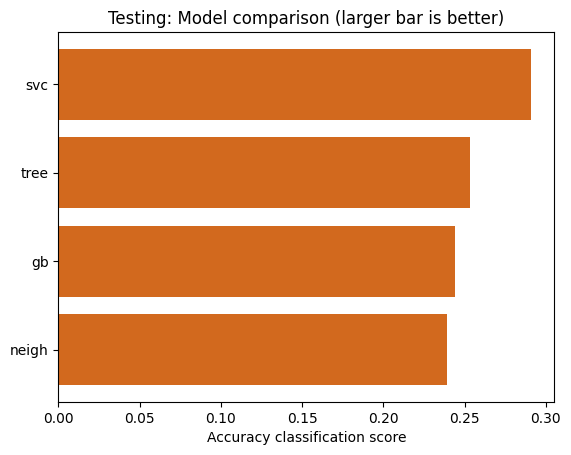

In [47]:
df_score_te.sort_values(by="test_score", ascending=True, inplace=True)
plt.barh(np.arange(len(score_te)), df_score_te.test_score, color='chocolate')
plt.yticks(np.arange(len(lst_name_clf_te)), df_score_te.name_clf_te)
#plt.xlim(0, 1.2)
plt.title('Testing: Model comparison (larger bar is better)')
plt.xlabel('Accuracy classification score')
plt.show()

# Present your solution

In [9]:
train_sol = train_mo.copy()
train_sol.head()
test_sol = test_mo.copy()
test_sol.columns

Index(['LG (mV)', 'HG (mV)', 'HG_div_LG', 'mean_LG', 'std_LG', 'var_LG',
       'median_LG', 'mean_HG', 'std_HG', 'var_HG', 'median_HG', 'target',
       'freq'],
      dtype='object')

## Explain why your solution achieves the objective
To `neigh`, `rnd`, `gb` and `tree` get how works generalized classifiers

### Evaluate the accuracy of a classification of the best classificator

Compare true target with predictions to evaluate solutions

**TODO**: Displays doesn't works to a few or only one frecuencies 

### K Neighbors

In [ ]:
y_pred = neigh_clf.predict(X_va.to_numpy())
y_pred_neigh = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq_neigh = X_va_freq.copy()
#X_va_freq.head()


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Validate Dataset: Total, Trues and fails predictions vs Frecuency to K Neighbors')
plt.tight_layout()
plt.show()

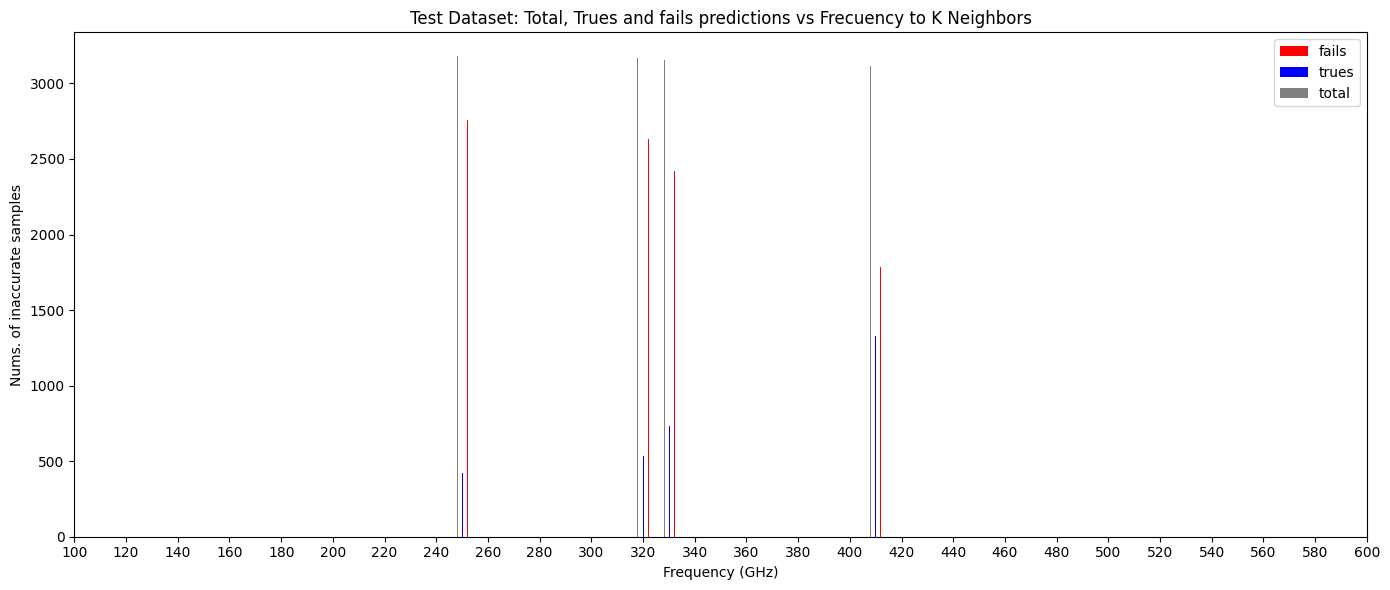

In [33]:
y_pred_te = neigh_clf.predict(X_te.to_numpy())
y_pred_te_neigh = y_pred_te.copy()
y_te_sol['y_pred'] = y_pred_te_neigh
y_te_sol = y_te.copy() 
y_te_sol['y_pred'] = y_pred_te_neigh
y_te_sol['true_pred'] = np.where(y_te_sol['y_pred'] == y_te_sol['target'],1,0)
X_te_freq = pd.concat([y_te_sol,X_te_freq_target[['freq']]], axis=1)


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_te_freq[X_te_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_te_freq[X_te_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_te_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Test Dataset: Total, Trues and fails predictions vs Frecuency to K Neighbors')
plt.tight_layout()
plt.show()

In [34]:
y_te_sol['true_pred'].value_counts()

true_pred
0    9597
1    3018
Name: count, dtype: int64

### Support Vector

**Notice**: Type of plastic are changed by numbers so `A1`, `B1`, `C1`, `D1`, `E1`, `E2`, `E3`, `F1`, `G1`, `H1`, `I1`, `J1`, `K1`, `L1`, `M1`, `N1`, `REF` are `0`, `1`, `2`, `3`, `4`, etc. and so on

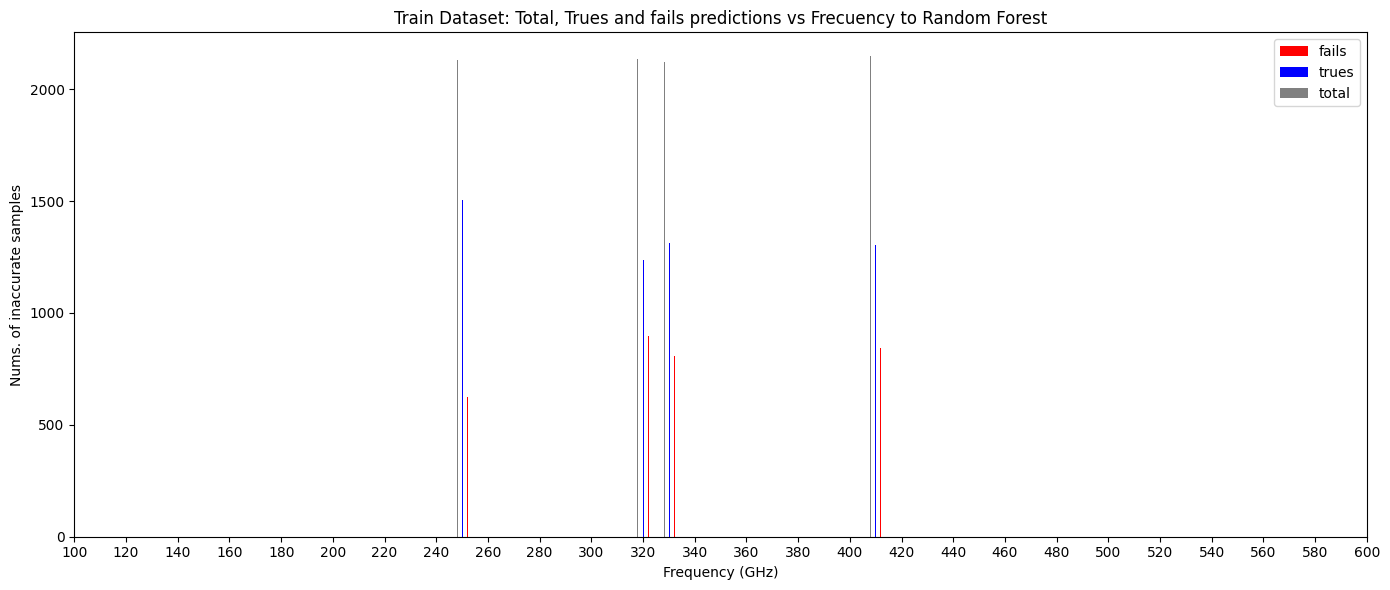

In [48]:
y_pred = svc_clf.predict(X_va.to_numpy())
y_pred_svc = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq_rnd = X_va_freq.copy()
#X_va_freq.head()


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Validate Dataset: Total, Trues and fails predictions vs Frecuency to Random Forest')
plt.tight_layout()
plt.show()

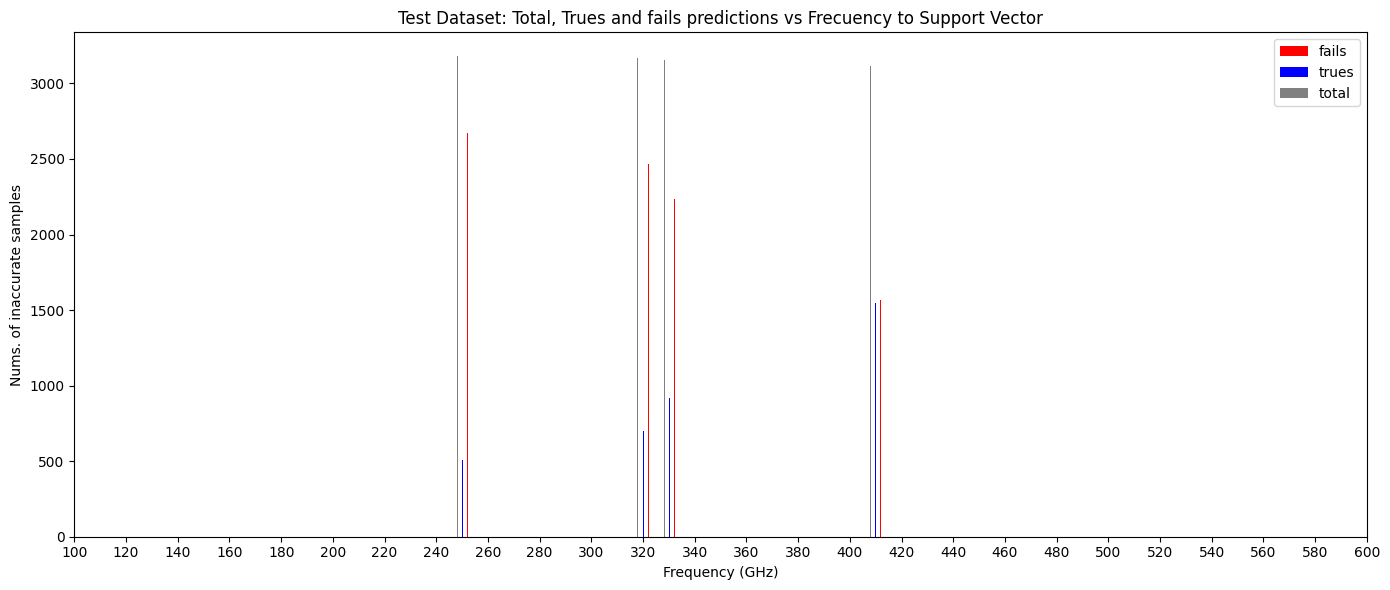

In [23]:
y_pred_te = svc_clf.predict(X_te.to_numpy())
y_pred_te_svc = y_pred_te.copy()
y_te_sol = y_te.copy() 
y_te_sol['y_pred'] = y_pred_te_svc
y_te_sol['true_pred'] = np.where(y_te_sol['y_pred'] == y_te_sol['target'],1,0)
X_te_freq = pd.concat([y_te_sol,X_te_freq_target[['freq']]], axis=1)


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_te_freq[X_te_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_te_freq[X_te_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_te_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Test Dataset: Total, Trues and fails predictions vs Frecuency to Support Vector')
plt.tight_layout()
plt.show()

In [51]:
y_te_sol['true_pred'].value_counts()

true_pred
0    8946
1    3669
Name: count, dtype: int64

### Gradient Boosting

In [ ]:
y_pred = gb_clf.predict(X_va.to_numpy())
y_pred_gb = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
#X_va_freq.head()


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Validate Dataset: Total, Trues and fails predictions vs Frecuency to Gradient Boosting')
plt.tight_layout()
plt.show()

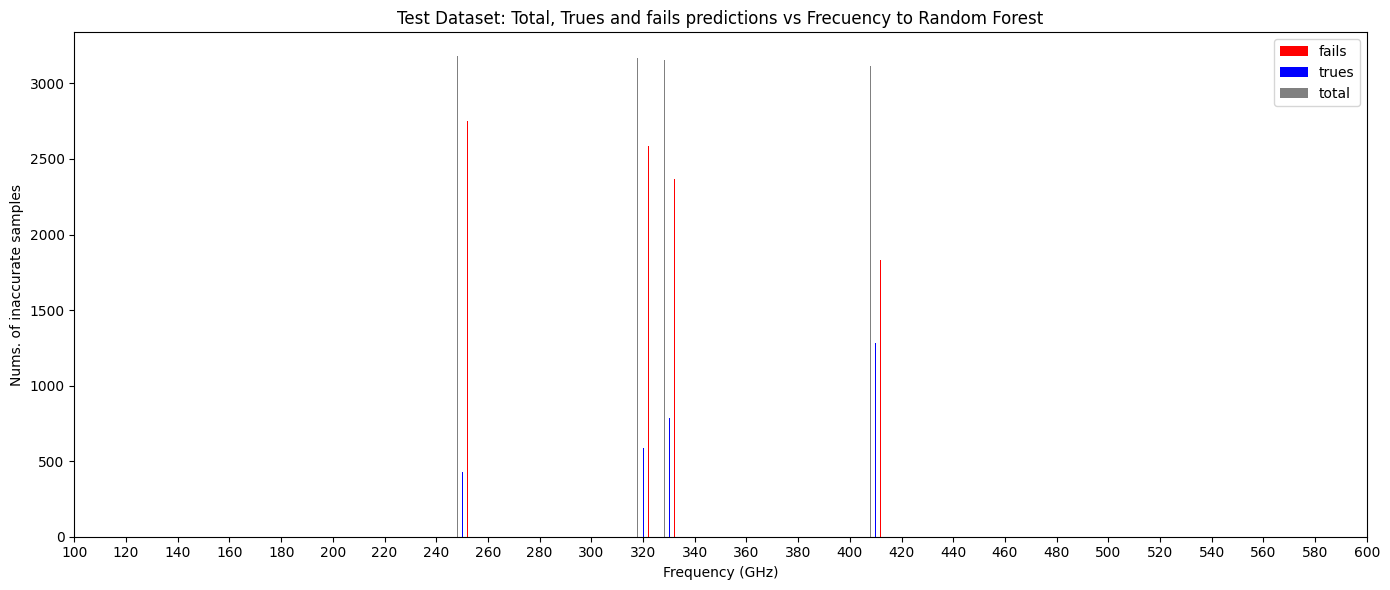

In [28]:
y_pred_te = gb_clf.predict(X_te.to_numpy())
y_pred_te_gb = y_pred_te.copy()
y_te_sol = y_te.copy() 
y_te_sol['y_pred'] = y_pred_te_gb
y_te_sol['true_pred'] = np.where(y_te_sol['y_pred'] == y_te_sol['target'],1,0)
X_te_freq = pd.concat([y_te_sol,X_te_freq_target[['freq']]], axis=1)


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_te_freq[X_te_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_te_freq[X_te_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_te_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Test Dataset: Total, Trues and fails predictions vs Frecuency to Gradient Boosting')
plt.tight_layout()
plt.show()

In [30]:
y_te_sol['true_pred'].value_counts()

true_pred
0    9421
1    3194
Name: count, dtype: int64

### Decision Tree

In [ ]:
y_pred = tree_clf.predict(X_va.to_numpy())
y_pred_tree = y_pred.copy()
y_va_sol = y_va.copy() 
y_va_sol['y_pred'] = y_pred 
y_va_sol['true_pred'] = np.where(y_va_sol['y_pred'] == y_va_sol['target'],1,0)
X_va_freq = pd.concat([y_va_sol,X_va_freq_target[['freq']]], axis=1)
X_va_freq_tree = X_va_freq.copy()
#X_va_freq.head()


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_va_freq[X_va_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_va_freq[X_va_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_va_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Validate Dataset: Total, Trues and fails predictions vs Frecuency to Decision Tree')
plt.tight_layout()
plt.show()

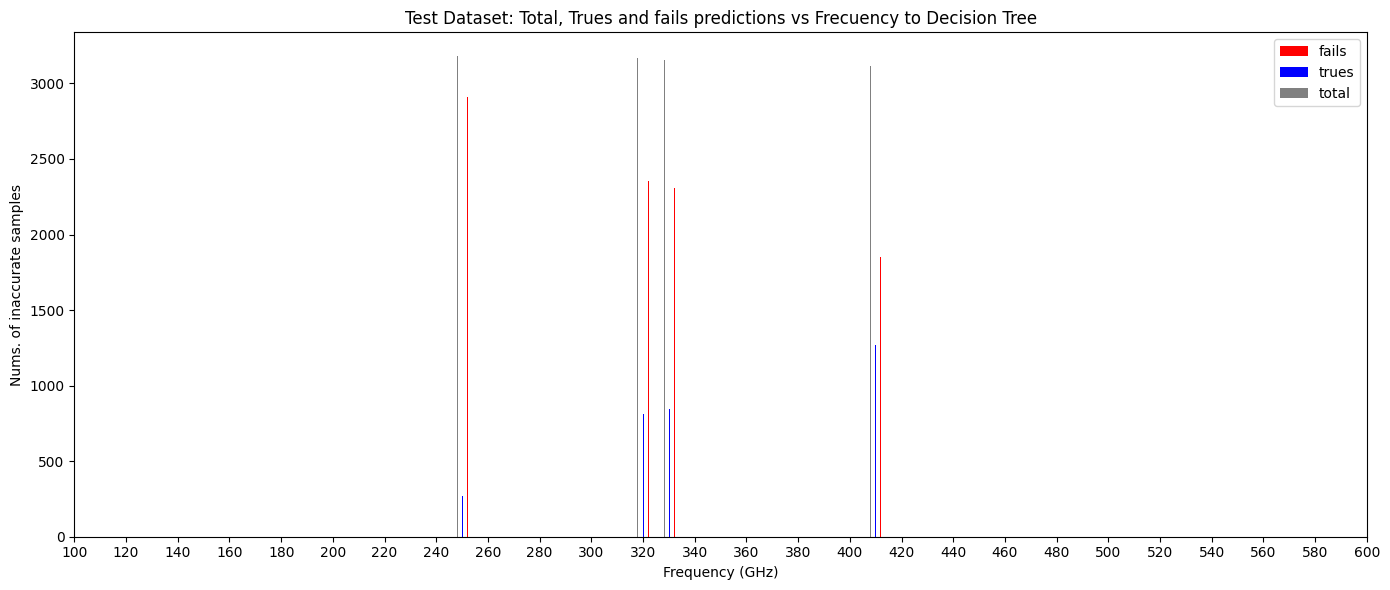

In [38]:
y_pred_te = tree_clf.predict(X_te.to_numpy())
y_pred_te_tree = y_pred_te.copy()
y_te_sol = y_te.copy() 
y_te_sol['y_pred'] = y_pred_te_tree
y_te_sol['true_pred'] = np.where(y_te_sol['y_pred'] == y_te_sol['target'],1,0)
X_te_freq = pd.concat([y_te_sol,X_te_freq_target[['freq']]], axis=1)


fig, ax = plt.subplots()
fig.set_size_inches(14, 6)
_ = ax.hist(X_te_freq[X_te_freq.true_pred==0]['freq'].apply(lambda x: np.sum([x, +2])).values, bins=408, label="fails", color="red")
_ = ax.hist(X_te_freq[X_te_freq.true_pred==1]['freq'].values, bins=408, label="trues", color="blue")
_ = ax.hist(X_te_freq['freq'].apply(lambda x: np.sum([x, -2])).values, bins=408, label="total", color="gray")
ax.legend()
ax.set_xlabel('Frequency (GHz)')
ticks = ax.set_xticks(np.arange(100, 601, 20))
ax.set_ylabel('Nums. of inaccurate samples')
ax.set_title('Test Dataset: Total, Trues and fails predictions vs Frecuency to Decision Tree')
plt.tight_layout()
plt.show()

In [37]:
y_te_sol['true_pred'].value_counts()

true_pred
0    9421
1    3194
Name: count, dtype: int64

**Insights** : 
* Central frecuencies have less fails than lower and upper frecuencies
* The frequency with the highest accuracy can now be identified: `350 Ghz`get").

### Count the number of times instances of types of plastics are misclassified
To `neigh`, `rnd`, `gb` and `tree` get how works generalized classifiers

**Code_Fixit**: change 

In [ ]:
gb_score = accuracy_score(y_va.target.to_numpy(), y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_neigh, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:12].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to K Neighbors ')
disp.plot(ax=ax)

In [ ]:
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_rnd, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:12].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to Random Forest ')
disp.plot(ax=ax)

In [ ]:
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_gb, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:12].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to Gradient Boost')
disp.plot(ax=ax)

In [ ]:
cm = confusion_matrix(y_va.target.to_numpy(), y_pred_tree, labels=neigh_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ordinal_encoder.categories_[0][0:12].tolist())
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('All frecuencies: Confusion Matrix to Decision Tree')
disp.plot(ax=ax)

**Insights**:
* Count the number of times instances of class `0` (or `A1`) are classified as otherone class `1`, `2` and so on. The first row of this matrix shows 418 (of 1224 samples) were correctly classified and non class 806 (115+89+57+116+38+54+47+53+27+25+30+34+47+74) were wrongly classified. 115 as type 1,  89 as type 2 and so on. 
* Besides, the first columns shows that class `0`  were wrongly classified 1795 (159+170+119+197+85+119+112+127+99+86+119+121+114+168) by other class. He might be the plastic which was most often confused by other plastic.


### Of validate dataset, explore what frecuencies classified by target 
#### K Neighbors

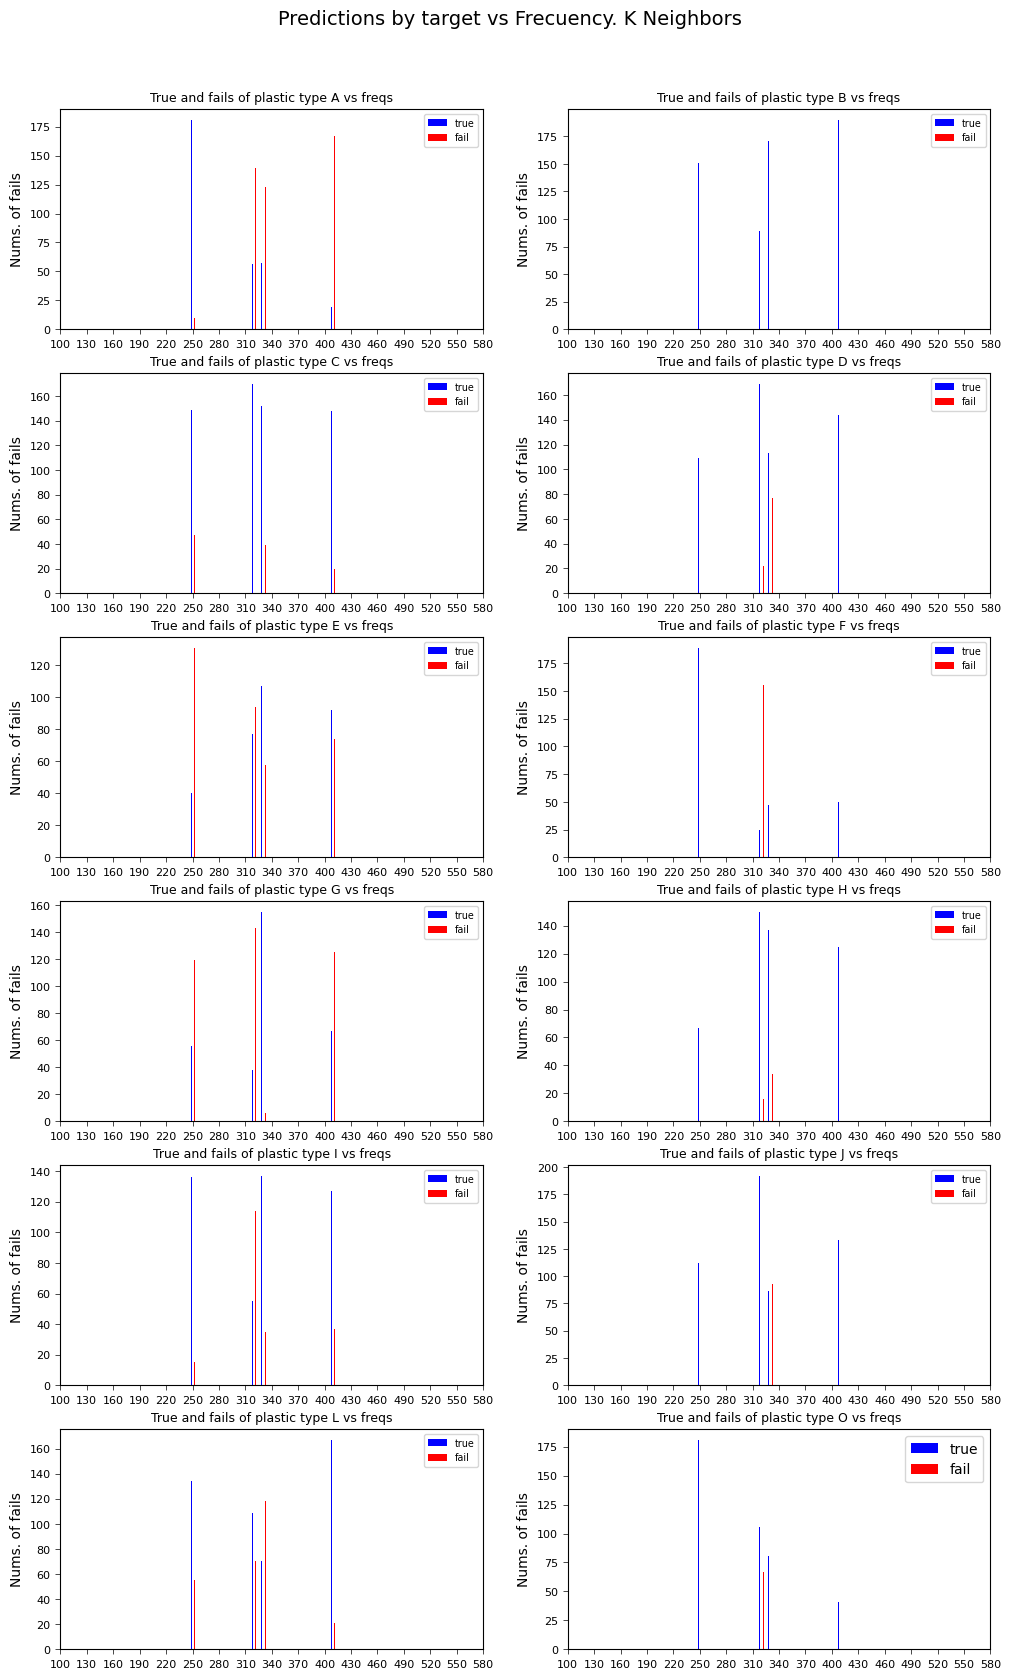

In [24]:
X_va_inaccurate = X_va_freq_neigh[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:12].tolist()
ncols = 2
nrows = 6
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 20))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Validate Dataset: Predictions by target vs Frecuency. K Neighbors", y=0.93,fontsize=14)
plt.legend()
plt.show()           

In [25]:
X_va_freq = X_va_freq_neigh.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies K Neighbors are: {lst_best_freq}")
lst_best_freq_neigh = lst_best_freq.copy()

The best frecuencies K Neighbors are: [250.0, 330.0, 320.0, 410.0]


#### Support Vector

In [26]:
X_va_inaccurate = X_va_freq_svc[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:12].tolist()
ncols = 2
nrows = 6
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 20))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Validate Dataset: Predictions by target vs Frecuency. Random Forest", y=0.93,fontsize=14)
plt.legend()
plt.show()           

NameError: name 'X_va_freq_svc' is not defined

In [ ]:
X_va_freq = X_va_freq_rnd.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies Random Forest are: {lst_best_freq}")
lst_best_freq_rnd = lst_best_freq.copy()

#### Gradient Boost

In [ ]:
X_va_inaccurate = X_va_freq_gb[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:12].tolist()
ncols = 2
nrows = 6
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 20))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Validate Dataset: Predictions by target vs Frecuency. Gradient Boost", y=0.93,fontsize=14)
plt.legend()
plt.show()           

In [ ]:
X_va_freq = X_va_freq_gb.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies Gradient Boost are: {lst_best_freq}")
lst_best_freq_gb = lst_best_freq.copy()

#### Decision Tree

In [ ]:
X_va_inaccurate = X_va_freq_tree[X_va_freq.true_pred==0]

lst_temp = ordinal_encoder.categories_[0][0:12].tolist()
ncols = 2
nrows = 6
t = 0
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 20))
for r in range(nrows):
     for c in range(ncols):

        x_fail = X_va_freq[(X_va_freq.true_pred==1) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, -2]))
        counts_f, bins_f = np.histogram(x_fail, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_f[:-1], bins_f, weights=counts_f, histtype='bar', label="true", color="blue")
        
        x_total = X_va_freq[(X_va_freq.true_pred==0) & (X_va_freq.target == t)]['freq'].apply(lambda x: np.sum([x, +2]))
        counts_t, bins_t = np.histogram(x_total, bins=3*len(lst_freq))
        _ =  axes[r ,c].hist(bins_t[:-1], bins_t, weights=counts_t, histtype='bar', label="fail", color="red")
         
        lst_temp[t]
        ticks = axes[r ,c].set_xticks(np.arange(100, 601, 30))
        axes[r ,c].legend(fontsize="x-small")
        axes[r, c].set_ylabel('Nums. of fails')
        axes[r, c].set_title(f'True and fails of plastic type {lst_temp[t]} vs freqs',fontsize=9)
        axes[r, c].tick_params(labelsize=8, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(6)
        t = t +1
plt.suptitle(f"Validate Dataset: Predictions by target vs Frecuency. Decision Tree", y=0.93,fontsize=14)
plt.legend()
plt.show()           

In [ ]:
X_va_freq = X_va_freq_tree.copy()
df_tmp = pd.DataFrame(
    {"False": X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().values,
     "True": X_va_freq[X_va_freq.true_pred==1]['freq'].value_counts().sort_index().values},
    index = X_va_freq[X_va_freq.true_pred==0]['freq'].value_counts().sort_index().index.tolist())
df_tmp['total'] = df_tmp['True'] + df_tmp['False']
df_tmp['Accuracy'] = df_tmp['True']/df_tmp['total']
lst_best_freq = df_tmp.sort_values(by='Accuracy',ascending= False).index.tolist()[:15]
print(f"The best frecuencies Gradient Boost are: {lst_best_freq}")
lst_best_freq_tree = lst_best_freq.copy()

In [ ]:
print (f" \nK Neighbors frecuencies: \t{lst_best_freq_neigh} \nRandom Forest frecuencies: \t{lst_best_freq_rnd} \nGradient Boost frecuencies: \t{lst_best_freq_gb} \nDecision Tree frecuencies: \t{lst_best_freq_tree}")